<b>Case 4 - Millennium BCP
<br>Group H

<br>| Ana Teresa Maia | r20201562 |
<br>| Henrique Falcão | r20201519 |
<br>| Maria Benedita Elias | 20230491 |
<br>| Maria Leonor Gusmão | 20230488 |
<br>| Pedro  Carvalho | 20230487 |


<br>Business Cases for Data Science S2 2023/2024

This Dataset is to be applied for the Processes that just entered their second activity: with activities being <b> Activity ID 102 or 105 <b>

<a name="top"></a> 
## Notebook Dynamic Index

* [Requirements](#req)
* [General Imports and Setup](#libraries)
* [Dataset Load](#load)
* [Final Preprocessing](#prep)
* [Metric and Non-Metric Feature Split](#metric)
* [Metric and Non-Metric Feature Split](#metric)
* [Dataset Split (Train and Validation)](#split)
* [Normalization + Encoding](#encoding)
* [Feature Selection](#select)
  * [Final Feature Selection](#selectfin)
* [Baseline Modeling](#base)
* [Model Tunning](#tun)
* [Models Feature Importance](#impot)
* [Train Metrics Comparison](#TRAIN)
* [Validation Implementation](#VAL)
* [Final Model Selection](#fin)
* [Final Model Intrepertation](#int)

<a class="anchor" id="req">

### Requirements (packages and versions)
###### [Go back to Contents](#top)
</a>

In [14]:
import pkg_resources

#Get a list of installed packages and their versions
installed_packages = pkg_resources.working_set

#Print package names and versions
for package in installed_packages:
    print(package)

mlxtend 0.23.1
Babel 2.14.0
Brotli 1.1.0
Cython 3.0.10
ImageHash 4.3.1
Jinja2 3.1.2
Markdown 3.6
MarkupSafe 2.1.3
MiniSom 2.3.0
Pillow 10.0.1
PyQt5 5.15.9
PyQt5-sip 12.12.2
PySocks 1.7.1
PyWavelets 1.4.1
PyYAML 6.0.1
QtPy 2.4.1
SOMPY 1.1.1
Send2Trash 1.8.2
absl-py 2.1.0
anyio 4.1.0
argon2-cffi 23.1.0
argon2-cffi-bindings 21.2.0
arrow 1.3.0
asttokens 2.4.1
astunparse 1.6.3
async-lru 2.0.4
attrs 23.1.0
beautifulsoup4 4.12.2
bleach 6.1.0
boto 2.49.0
cached-property 1.5.2
catboost 1.2.3
category-encoders 2.6.3
certifi 2023.11.17
cffi 1.16.0
charset-normalizer 3.3.2
cmdstanpy 1.2.2
colorama 0.4.6
comm 0.1.4
contourpy 1.2.0
cycler 0.12.1
dacite 1.8.0
dataclasses 0.8
debugpy 1.8.0
decorator 5.1.1
defusedxml 0.7.1
ds-utils 0.4.1
entrypoints 0.4
et-xmlfile 1.1.0
exceptiongroup 1.2.0
executing 2.0.1
fastjsonschema 2.19.0
flatbuffers 24.3.25
fonttools 4.46.0
fqdn 1.5.1
gast 0.5.4
google-pasta 0.2.0
graphviz 0.20.1
grpcio 1.62.1
h5py 3.10.0
holidays 0.46
htmlmin 0.1.12
idna 3.6
imagecodecs 2023.9.

<a class="anchor" id="libraries">

### General Imports and Setup
###### [Go back to Contents](#top)
</a>

In [15]:
#general imports
import pandas as pd
import numpy as np
from collections import Counter

#For visualizations
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import math
import matplotlib.colors as mcolors

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Setting seaborn style
sns.set()

#To avoid too many warnings in graphs
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

#Split 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

#Encoding
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

#Models 
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
colors = {"magenta": "#E20074",     "dark_gray": "#333333",     "light_gray": "#F2F2F2"}

<a class="anchor" id="load">

### Dataset Load
###### [Go back to Contents](#top)
</a>

The dataset we will work with under this notebook corresponds to the prefix extraction 2, where processes are entering the first time activities with ID 102 or 105.

In [17]:
dataset = pd.read_csv('processed_and_transformed_subset_2.csv')
#dataset.set_index("Task Id", inplace=True)

In [18]:
dataset

,Task arrival date_act1,Actvity ID_act1,Task Executer_act1,Task executer department_act1,Task Type_act1,Action_act1,idBPMApplicationAction_act1,Period between arrival and execution_act1,Period between arrival and capture_act1,Cumulative Length of Process_act1,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,Actvity ID_last_act2,Task arrival date_last_act2
0,2022-04-11 16:02:13.820,100,7638,7638,Initial Request,Submit initial request,270,0,0,1,...,1,0,0,0,0,2,0,1,102,2022-04-11 16:02:14.743
1,2022-04-12 10:50:25.570,100,598,598,Initial Request,Submit initial request,270,0,0,1,...,1,0,0,0,0,0,0,0,102,2022-04-12 10:50:26.147
2,2022-04-13 08:15:39.620,100,924,924,Initial Request,Submit initial request,270,0,0,1,...,1,0,0,0,0,0,0,0,102,2022-04-13 08:15:40.310
3,2022-04-13 08:37:34.943,100,8601,8601,Initial Request,Submit initial request,270,0,0,1,...,2,0,0,0,0,0,0,0,102,2022-04-13 08:37:36.070
4,2022-04-13 09:46:18.410,100,11029,11029,Initial Request,Submit initial request,270,0,0,1,...,2,0,0,0,0,0,0,0,102,2022-04-13 09:46:19.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45016,2024-04-01 09:08:13.167,100,610,610,Initial Request,Submit initial request,270,0,0,1,...,0,0,0,0,0,0,0,0,102,2024-04-01 09:08:16.177
45017,2024-04-01 09:13:34.370,100,9549,9549,Initial Request,Submit initial request,270,0,0,1,...,0,1,0,0,0,0,0,0,102,2024-04-01 09:13:34.690
45018,2024-04-01 09:45:06.497,100,7351,7351,Initial Request,Submit initial request,270,0,0,1,...,0,1,1,2,1,0,0,0,102,2024-04-01 09:45:06.900
45019,2024-04-15 18:16:21.270,100,7945,7945,Initial Request,Submit initial request,270,0,0,1,...,1,0,1,0,0,2,0,1,102,2024-04-15 18:16:21.570


<a class="anchor" id="prep">

### Final preprocessing
###### [Go back to Contents](#top)
</a>

#### Extraction of relevant information

Since columns such as date columns can be too specific to each process, it tends to lead to overfit, as we could see on the Modelling phase. To go around this we will make an extraction of the month day and hour of each process when it entered each activity, reducing this way the danger of overfitting later on.

In [19]:
# List of task arrival date columns
task_arrival_columns = [col for col in dataset.columns if col.startswith('Task arrival date')]

for col in task_arrival_columns:
    # Convert to datetime
    dataset[col] = pd.to_datetime(dataset[col])
    
    # Extract the activity identifier (e.g., act1, act2, last_act3)
    act_identifier = col.split('_')[-1]
    
    # Extract year, month, day, and hour
    dataset[f'Month_{act_identifier}'] = dataset[col].dt.month
    dataset[f'Hour_{act_identifier}'] = dataset[col].dt.hour
    dataset[f'Day_{act_identifier}'] = dataset[col].dt.day

# Drop the original Task arrival date columns
dataset.drop(columns=task_arrival_columns, inplace=True)

# Display the resulting DataFrame
dataset

,Actvity ID_act1,Task Executer_act1,Task executer department_act1,Task Type_act1,Action_act1,idBPMApplicationAction_act1,Period between arrival and execution_act1,Period between arrival and capture_act1,Cumulative Length of Process_act1,Overdue Days_act1,...,Value_1,Value_80,Value_90,Actvity ID_last_act2,Month_act1,Hour_act1,Day_act1,Month_act2,Hour_act2,Day_act2
0,100,7638,7638,Initial Request,Submit initial request,270,0,0,1,0,...,2,0,1,102,4,16,11,4,16,11
1,100,598,598,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,10,12,4,10,12
2,100,924,924,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,8,13,4,8,13
3,100,8601,8601,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,8,13,4,8,13
4,100,11029,11029,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,9,13,4,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45016,100,610,610,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,9,1,4,9,1
45017,100,9549,9549,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,9,1,4,9,1
45018,100,7351,7351,Initial Request,Submit initial request,270,0,0,1,0,...,0,0,0,102,4,9,1,4,9,1
45019,100,7945,7945,Initial Request,Submit initial request,270,0,0,1,0,...,2,0,1,102,4,18,15,4,18,15


In [20]:
dataset.columns  #New Vars were created successfully

Index(['Actvity ID_act1', 'Task Executer_act1',
       'Task executer department_act1', 'Task Type_act1', 'Action_act1',
       'idBPMApplicationAction_act1',
       'Period between arrival and execution_act1',
       'Period between arrival and capture_act1',
       'Cumulative Length of Process_act1', 'Overdue Days_act1',
       'Role ID_act1', 'Years in Org Position_act1', 'Age_act1',
       'idBPMRequirement_act1', 'Target', 'NumberOfFemales',
       'NumberOfManagers', 'NumberOfOutsourcers', 'NumberOfRejections',
       'Value Count', 'idField_203', 'idField_3486', 'idField_3388',
       'idField_3391', 'idField_3390', 'idField_3491', 'idField_3420',
       'idField_3935', 'idField_47', 'idField_1602', 'idField_1604',
       'Value_10', 'Value_50', 'Value_30', 'Value_70', 'Value_20', 'Value_100',
       'Value_60', 'Value_2', 'Value_40', 'Value_1', 'Value_80', 'Value_90',
       'Actvity ID_last_act2', 'Month_act1', 'Hour_act1', 'Day_act1',
       'Month_act2', 'Hour_act2', 'Day_a

We also noticed that datatypes no longer are correctly representing each feature type. As so we corrected them:

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45021 entries, 0 to 45020
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Actvity ID_act1                            45021 non-null  int64 
 1   Task Executer_act1                         45021 non-null  object
 2   Task executer department_act1              45021 non-null  object
 3   Task Type_act1                             45021 non-null  object
 4   Action_act1                                45021 non-null  object
 5   idBPMApplicationAction_act1                45021 non-null  int64 
 6   Period between arrival and execution_act1  45021 non-null  int64 
 7   Period between arrival and capture_act1    45021 non-null  int64 
 8   Cumulative Length of Process_act1          45021 non-null  int64 
 9   Overdue Days_act1                          45021 non-null  int64 
 10  Role ID_act1                      

In [22]:
# List of columns to be converted to 'object' type
columns_to_convert = [
    'idField_203', 'idField_3486', 'idField_3388', 'idField_3391',
    'idField_3390', 'idField_3491', 'idField_3420', 'idField_3935', 
    'idField_47', 'idField_1602', 'idField_1604', 'Actvity ID_last_act2','Actvity ID_act1','idBPMApplicationAction_act1','Role ID_act1','idBPMRequirement_act1',
    'Month_act1','Day_act1','Hour_act1','Month_act2','Day_act2','Hour_act2'
]

# Converting the specified columns to 'object' type
dataset[columns_to_convert] = dataset[columns_to_convert].astype('object')

Datatypes are correct:

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45021 entries, 0 to 45020
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Actvity ID_act1                            45021 non-null  object
 1   Task Executer_act1                         45021 non-null  object
 2   Task executer department_act1              45021 non-null  object
 3   Task Type_act1                             45021 non-null  object
 4   Action_act1                                45021 non-null  object
 5   idBPMApplicationAction_act1                45021 non-null  object
 6   Period between arrival and execution_act1  45021 non-null  int64 
 7   Period between arrival and capture_act1    45021 non-null  int64 
 8   Cumulative Length of Process_act1          45021 non-null  int64 
 9   Overdue Days_act1                          45021 non-null  int64 
 10  Role ID_act1                      

In [24]:
#These copies are made to ensure safety to comeback later on if any undesired change was performed.
final_df=dataset.copy() 

In [25]:
#To unsure we dont have any strange value we will check the variables unique values 
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  # For better readability

Unique values in column 'Actvity ID_act1':
[100]

Unique values in column 'Task Executer_act1':
['7638' '598' '924' ... '2218' '2318' '8522']

Unique values in column 'Task executer department_act1':
['7638' '598' '924' ... '2218' '2318' '8522']

Unique values in column 'Task Type_act1':
['Initial Request']

Unique values in column 'Action_act1':
['Submit initial request']

Unique values in column 'idBPMApplicationAction_act1':
[270]

Unique values in column 'Period between arrival and execution_act1':
[0]

Unique values in column 'Period between arrival and capture_act1':
[0]

Unique values in column 'Cumulative Length of Process_act1':
[1]

Unique values in column 'Overdue Days_act1':
[0]

Unique values in column 'Role ID_act1':
[5 6 1 3 4 9 2 12 0 10 13 29 26 21 65 37 8 40 83 34 59 33 7 22]

Unique values in column 'Years in Org Position_act1':
[ 3  1  4  0  5  2 11 15  9  8 10  7  6 13 12 14 20 16 19 18 17 23]

Unique values in column 'Age_act1':
[57 45 41 58 49 33 51 42 47 29 53 5

All values are logically fine.

<a class="anchor" id="metric">

### Metric and Non-Metric Feature Split
###### [Go back to Contents](#top)
</a>

In [26]:
#Extracting metric and non-metric features 

# List to store metric features
metric_features = []

# List to store non-metric features
non_metric_features = []

# Iterate through columns for predictions_100
for column in final_df.columns:
    if column != 'Target':  # Exclude the target column
        if column.startswith(('Period between arrival and execution', 
                              'Period between arrival and capture', 
                              'Length of the Process',  
                              'Overdue Days', 
                              'Age', 
                              'Years in Org Position',
                              'NumberOfFemales',
                              'NumberOfManagers',
                              'NumberOfOutsourcers',
                              'NumberOfRejections',
                              'Value Count','Value_10', 
                              'Value_50', 'Value_30', 'Value_70',
                              'Value_20', 'Value_100', 'Value_60', 
                              'Value_2', 'Value_40', 'Value_1',
                              'Value_80', 'Value_90',
                              'Cumulative Length of Process')):
            metric_features.append(column)
        else:
            non_metric_features.append(column)

In [27]:
# Print the lists of metric and non-metric features
print("Metric Features:")
for feature in metric_features:
    print(feature)

print("\nNon-Metric Features:")
for feature in non_metric_features:
    print(feature)

Metric Features:
Period between arrival and execution_act1
Period between arrival and capture_act1
Cumulative Length of Process_act1
Overdue Days_act1
Years in Org Position_act1
Age_act1
NumberOfFemales
NumberOfManagers
NumberOfOutsourcers
NumberOfRejections
Value Count
Value_10
Value_50
Value_30
Value_70
Value_20
Value_100
Value_60
Value_2
Value_40
Value_1
Value_80
Value_90

Non-Metric Features:
Actvity ID_act1
Task Executer_act1
Task executer department_act1
Task Type_act1
Action_act1
idBPMApplicationAction_act1
Role ID_act1
idBPMRequirement_act1
idField_203
idField_3486
idField_3388
idField_3391
idField_3390
idField_3491
idField_3420
idField_3935
idField_47
idField_1602
idField_1604
Actvity ID_last_act2
Month_act1
Hour_act1
Day_act1
Month_act2
Hour_act2
Day_act2


In [28]:
#List with all column names from final_df2
all_features = final_df.columns.tolist()
all_features.remove('Target')

<a class="anchor" id="split">

### Dataset Split (Train and Validation)
###### [Go back to Contents](#top)
</a>

In order to evaluate our work with relevant metrics, we did the train-val split. Since we dont have that many examples (processes) we decided to use cross validation further ahead to go over the fact of not having a separate test set and yet try to achieve accurate results.

In [29]:
data_split = final_df.copy()

In [30]:
X = data_split.drop('Target', axis = 1)
target_multiclass = data_split['Target']

We are setting the stratify parameter to ensure that the target classes mantain the same distribution for the train and validation dataset

In [31]:
#Split the data into train and validation
#30% of the dataset was allocated to the validation set 

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_multiclass,
                                                  test_size = 0.3,
                                                  random_state = 42,
                                                  stratify = target_multiclass,
                                                  shuffle = True)

Now we can see that our dataset is imbalanced, meaning that we have target classes with much more examples associated to it than others. Target variable 3 has 46% of represantation in the entire dataset. Latter we will apply techniques to try to overcome this problem to still have a good predictive performance accross all possible outcomes.

In [32]:
# Get the percentage of each target value in the train dataset
percentage_per_class = y_train.value_counts(normalize=True) * 100

# Display the percentage of each target value
print("Percentage of each target value in the train dataset:")
print(percentage_per_class)

Percentage of each target value in the train dataset:
Target
2    43.596497
3    33.239195
1    19.829282
0     3.335026
Name: proportion, dtype: float64


In [33]:
y_train.value_counts()

Target
2    13739
3    10475
1     6249
0     1051
Name: count, dtype: int64

In [34]:
# Get the percentage of each target value in the train dataset
percentage_per_class = y_val.value_counts(normalize=True) * 100

# Display the percentage of each target value
print("Percentage of each target value in the validation dataset:")
print(percentage_per_class)

Percentage of each target value in the validation dataset:
Target
2    43.592211
3    33.242023
1    19.834160
0     3.331606
Name: proportion, dtype: float64


We just checked that the target variable keeped more or less the same distribution for train and validation set.

<a class="anchor" id="encoding">

#### Normalization + Encoding
###### [Go back to Contents](#top)
</a>

We perform this step only after the split to avoid data leakage.

Target encoding inputes the percentage of likelihood of having a certain category in each target, transforming non-metric features in metric features.

In [35]:
X_train_unscalled = X_train.copy()

In [36]:
X_val_unscalled = X_val.copy

In [37]:
# Target encoding for Train and Validation
encoder = ce.TargetEncoder(handle_missing = 'return_nan')

# Iterate through the non-metric features
for column in non_metric_features:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

Normalization allows to standardize the impact each feature has on the target by removing the magnitude effect each variable held itself.

In [38]:
scaler = MinMaxScaler()

# Iterate through the metric features
for column in all_features:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

Ensuring that all variables are between 0 and 1 to overcome the problem of having different scales. When that is the case, our models can give more importance to variables with larger scale.

In [39]:
#Ensuring that all variables of the dataset are between 0 and 1 
pd.concat([X_train.min().round(3), X_train.max().round(1)], axis = 1, keys = ['Minimum Value', 'Maximum Value'])

,Minimum Value,Maximum Value
Actvity ID_act1,0.0,0.0
Task Executer_act1,0.0,1.0
Task executer department_act1,0.0,1.0
Task Type_act1,0.0,0.0
Action_act1,0.0,0.0
idBPMApplicationAction_act1,0.0,0.0
Period between arrival and execution_act1,0.0,0.0
Period between arrival and capture_act1,0.0,0.0
Cumulative Length of Process_act1,0.0,0.0
Overdue Days_act1,0.0,0.0


Another copy to ensure we can comeback if a further undesired transformation is made.

In [40]:
X_smote=X_train.copy()
y_smote=y_train.copy()

In [41]:
y_smote.value_counts()

Target
2    13739
3    10475
1     6249
0     1051
Name: count, dtype: int64

<a class="anchor" id="select">

#### Feature Selection
###### [Go back to Contents](#top)
</a>

### 1. Features Variance 

Firstly, we are going to check the variance of the features. If the variance is equal to zero, the features will be removed, since its not adding any information to the model, it does not allow the model to discriminate between examples

In [42]:
#Univariate variables: Check the variance of each feature
variance_values = X_smote.var().round(10)*100
print(variance_values)

Actvity ID_act1                               0.000000
Task Executer_act1                            3.709214
Task executer department_act1                 3.709214
Task Type_act1                                0.000000
Action_act1                                   0.000000
idBPMApplicationAction_act1                   0.000000
Period between arrival and execution_act1     0.000000
Period between arrival and capture_act1       0.000000
Cumulative Length of Process_act1             0.000000
Overdue Days_act1                             0.000000
Role ID_act1                                  2.029514
Years in Org Position_act1                    1.545879
Age_act1                                      2.712845
idBPMRequirement_act1                         0.000000
NumberOfFemales                              24.999343
NumberOfManagers                              1.788294
NumberOfOutsourcers                           1.788294
NumberOfRejections                            0.000000
Value Coun

In [43]:
#List of variables to eliminate
variance_eliminate = variance_values[variance_values == 0].index.tolist()
variance_eliminate

['Actvity ID_act1',
 'Task Type_act1',
 'Action_act1',
 'idBPMApplicationAction_act1',
 'Period between arrival and execution_act1',
 'Period between arrival and capture_act1',
 'Cumulative Length of Process_act1',
 'Overdue Days_act1',
 'idBPMRequirement_act1',
 'NumberOfRejections',
 'idField_203',
 'idField_3486',
 'idField_3388']

In [44]:
#Dropping them already 
X_smote.drop(columns=variance_eliminate, inplace=True)
X_val.drop(columns=variance_eliminate, inplace=True)

### Correlation Matrices 

We are going to see the correlation between independent features (X), if there are 2 features highly correlated (bigger than 0.8) we are going to eliminate the one that has the lowest correlation with the target. Because of this, we will eliminate redundant information and irrelevant information as well. On top of this we eliminate the features that have low correlation with the target (bellow 0.05) since they will not add much to predict our problem.

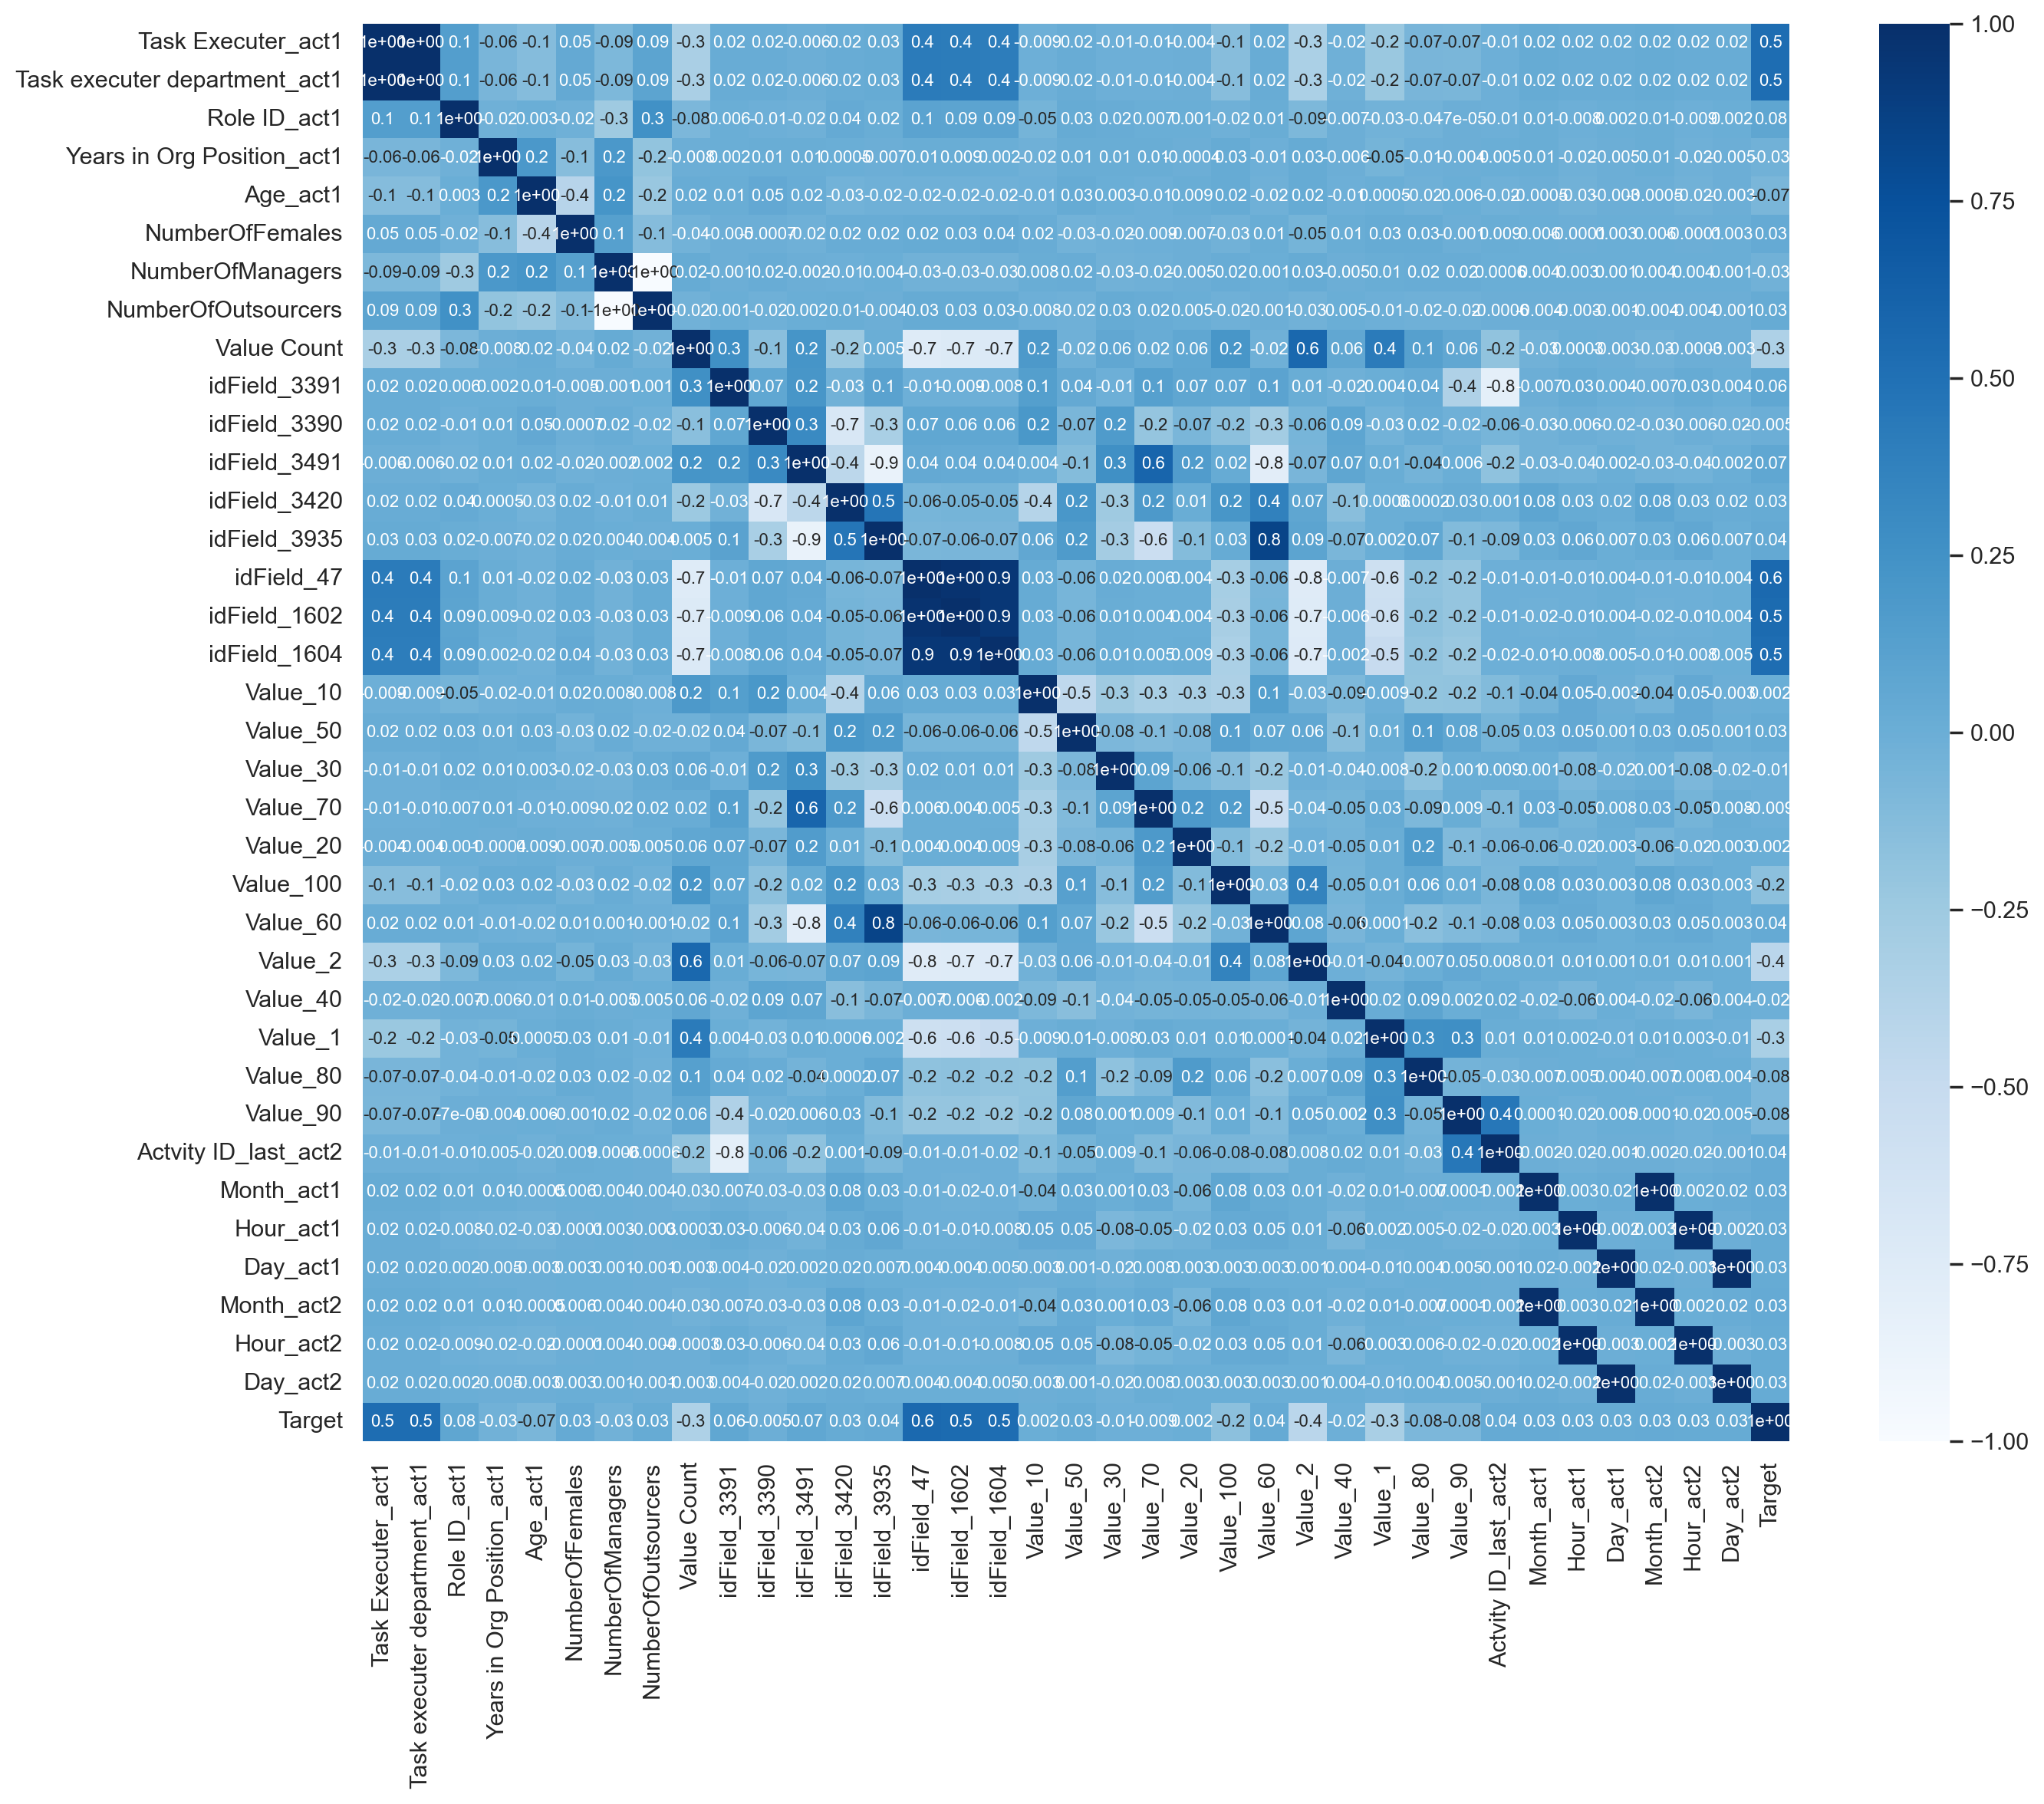

In [45]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

# Check Spearman Correlation
correlation_features = pd.concat([X_smote, y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

In [46]:
#Get correlation matrix for features only (excluding the Target)
feature_corr = cor_spearman.loc[X_smote.columns, X_smote.columns]

#List to keep track of features to eliminate
spearman_eliminate = []

#Iterate over each column and find highly correlated pairs
for i in range(len(feature_corr.columns)):
    for j in range(i):
        if abs(feature_corr.iloc[i, j]) > 0.8:  # Check high correlation
            col_i = feature_corr.columns[i]
            col_j = feature_corr.columns[j]
            target_corr_i = abs(cor_spearman.loc[col_i, 'Target'])
            target_corr_j = abs(cor_spearman.loc[col_j, 'Target'])
            #Eliminate the feature with lower correlation to the target
            if target_corr_i < target_corr_j:
                spearman_eliminate.append(col_i)
            else:
                spearman_eliminate.append(col_j)

#Remove duplicates from the elimination list
spearman_eliminate = list(set(spearman_eliminate))

#Eliminate features with low correlation to the target variable
for col in X_smote.columns:
    if abs(cor_spearman.loc[col, 'Target']) < 0.05:
        spearman_eliminate.append(col)

#Remove duplicates again in case some features are added twice
spearman_eliminate = list(set(spearman_eliminate))

#list of features to eliminate
print("Features to eliminate:", spearman_eliminate)

#Remaining features after elimination
remaining_features = [col for col in X_smote.columns if col not in spearman_eliminate]
print("Remaining features:", remaining_features)

Features to eliminate: ['Day_act2', 'Month_act1', 'Value_50', 'Task Executer_act1', 'Value_60', 'Actvity ID_last_act2', 'Value_20', 'NumberOfFemales', 'NumberOfManagers', 'Hour_act1', 'Value_10', 'Value_40', 'NumberOfOutsourcers', 'Value_30', 'idField_3420', 'idField_1604', 'Day_act1', 'Years in Org Position_act1', 'idField_3935', 'Value_70', 'Month_act2', 'Hour_act2', 'idField_3390', 'idField_1602']
Remaining features: ['Task executer department_act1', 'Role ID_act1', 'Age_act1', 'Value Count', 'idField_3391', 'idField_3491', 'idField_47', 'Value_100', 'Value_2', 'Value_1', 'Value_80', 'Value_90']


### RFE 

We are going to use RFE to identify the most important features for our model. The process involves recursively training the model with subsets of features, removing the least important features at each iteration until the desired number of features is reached (based on the model's performance, using f1-score on the validation dataset)

In [33]:
nof_list = np.arange(2, len(X_train.columns) + 1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state = 42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_smote, y_smote)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_smote)

    #Storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_smote, train_pred, average='weighted')
    train_score_list.append(train_score)

    #Storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred, average='weighted')
    val_score_list.append(val_score)

    #Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 33
Score with 33 features: 0.734024


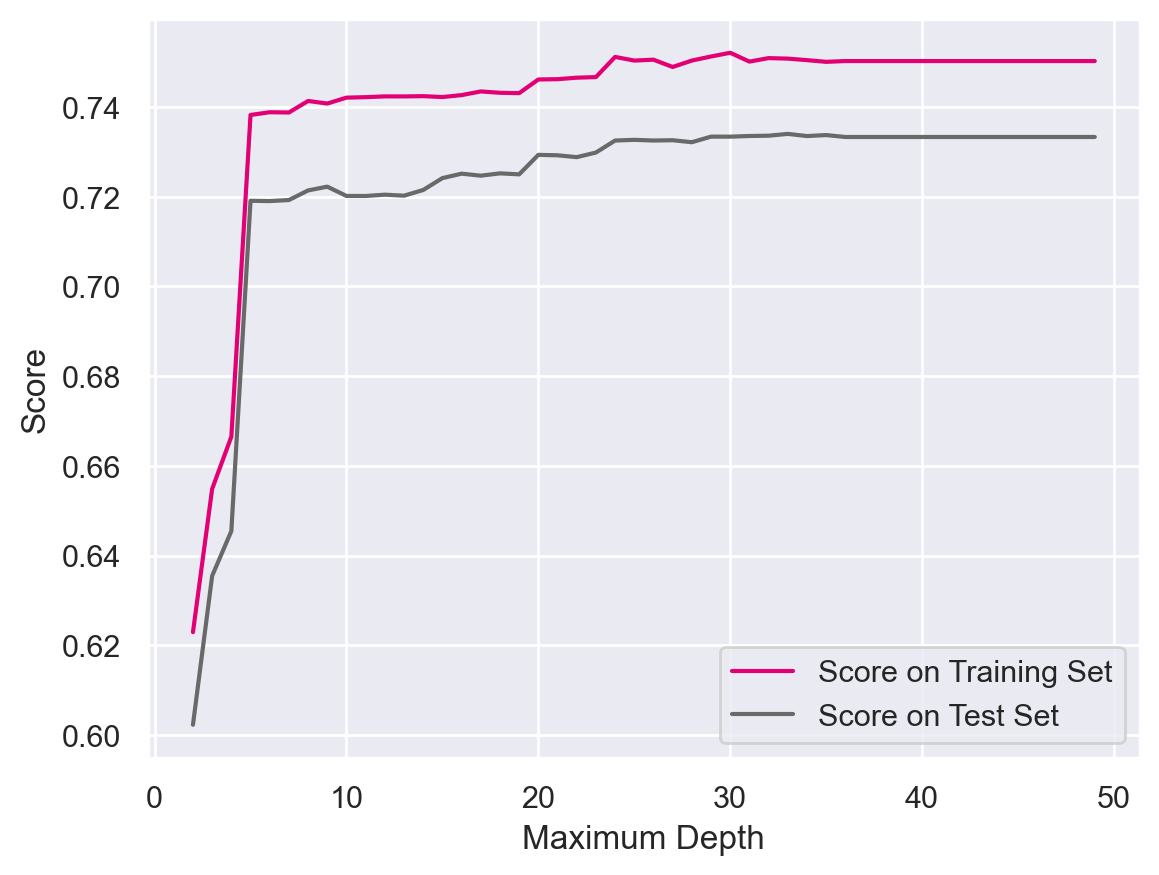

In [34]:
plt.plot(list(range(2, len(X_train.columns) + 1)), train_score_list, label = "Score on Training Set", color = "#E20074")
plt.plot(list(range(2, len(X_train.columns) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We have chosen 7 features since we are trying to maxime the f1-score on the validation set and minimize the difference in the score of the val to the train set (minimize overfitting), and mostly, reduce dimensionality.

In [47]:
#Fitting the model again, but now with the desired number of features 
model = LogisticRegression(random_state=42)
rfe = RFE(estimator = model, n_features_to_select = 7)

X_rfe = rfe.fit_transform(X_smote, y_smote)

In [48]:
#Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_smote.columns)

Task Executer_act1                True
Task executer department_act1     True
Role ID_act1                     False
Years in Org Position_act1       False
Age_act1                         False
NumberOfFemales                  False
NumberOfManagers                 False
NumberOfOutsourcers              False
Value Count                      False
idField_3391                     False
idField_3390                     False
idField_3491                      True
idField_3420                     False
idField_3935                      True
idField_47                        True
idField_1602                     False
idField_1604                     False
Value_10                         False
Value_50                         False
Value_30                         False
Value_70                         False
Value_20                         False
Value_100                        False
Value_60                          True
Value_2                          False
Value_40                 

In [49]:
#List with features to eliminate
rfe_eliminate = []
rfe_dataset = pd.Series(rfe.support_, index = X_smote.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [50]:
rfe_eliminate

['Role ID_act1',
 'Years in Org Position_act1',
 'Age_act1',
 'NumberOfFemales',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'Value Count',
 'idField_3391',
 'idField_3390',
 'idField_3420',
 'idField_1602',
 'idField_1604',
 'Value_10',
 'Value_50',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_2',
 'Value_40',
 'Value_1',
 'Value_80',
 'Value_90',
 'Month_act1',
 'Hour_act1',
 'Day_act1',
 'Month_act2',
 'Hour_act2',
 'Day_act2']

### Lasso

Lasso helps us pick the most important features for our model. It squeezes out less useful features by making their effects smaller, while keeping the important ones.

In [51]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [52]:
reg = LassoCV()
reg.fit(X_smote, y_smote)

coef = pd.Series(reg.coef_, index = X_smote.columns).round(6)
coef

Task Executer_act1               1.210007
Task executer department_act1    0.000000
Role ID_act1                    -0.062924
Years in Org Position_act1      -0.098150
Age_act1                        -0.070549
NumberOfFemales                 -0.008979
NumberOfManagers                 0.036396
NumberOfOutsourcers             -0.000000
Value Count                      0.000000
idField_3391                     0.844423
idField_3390                    -0.058333
idField_3491                     1.453856
idField_3420                     0.100418
idField_3935                     0.915869
idField_47                       1.052918
idField_1602                    -0.000000
idField_1604                    -0.010981
Value_10                        -0.051983
Value_50                         0.062373
Value_30                         0.000000
Value_70                        -0.399202
Value_20                         0.034418
Value_100                        0.029262
Value_60                         0

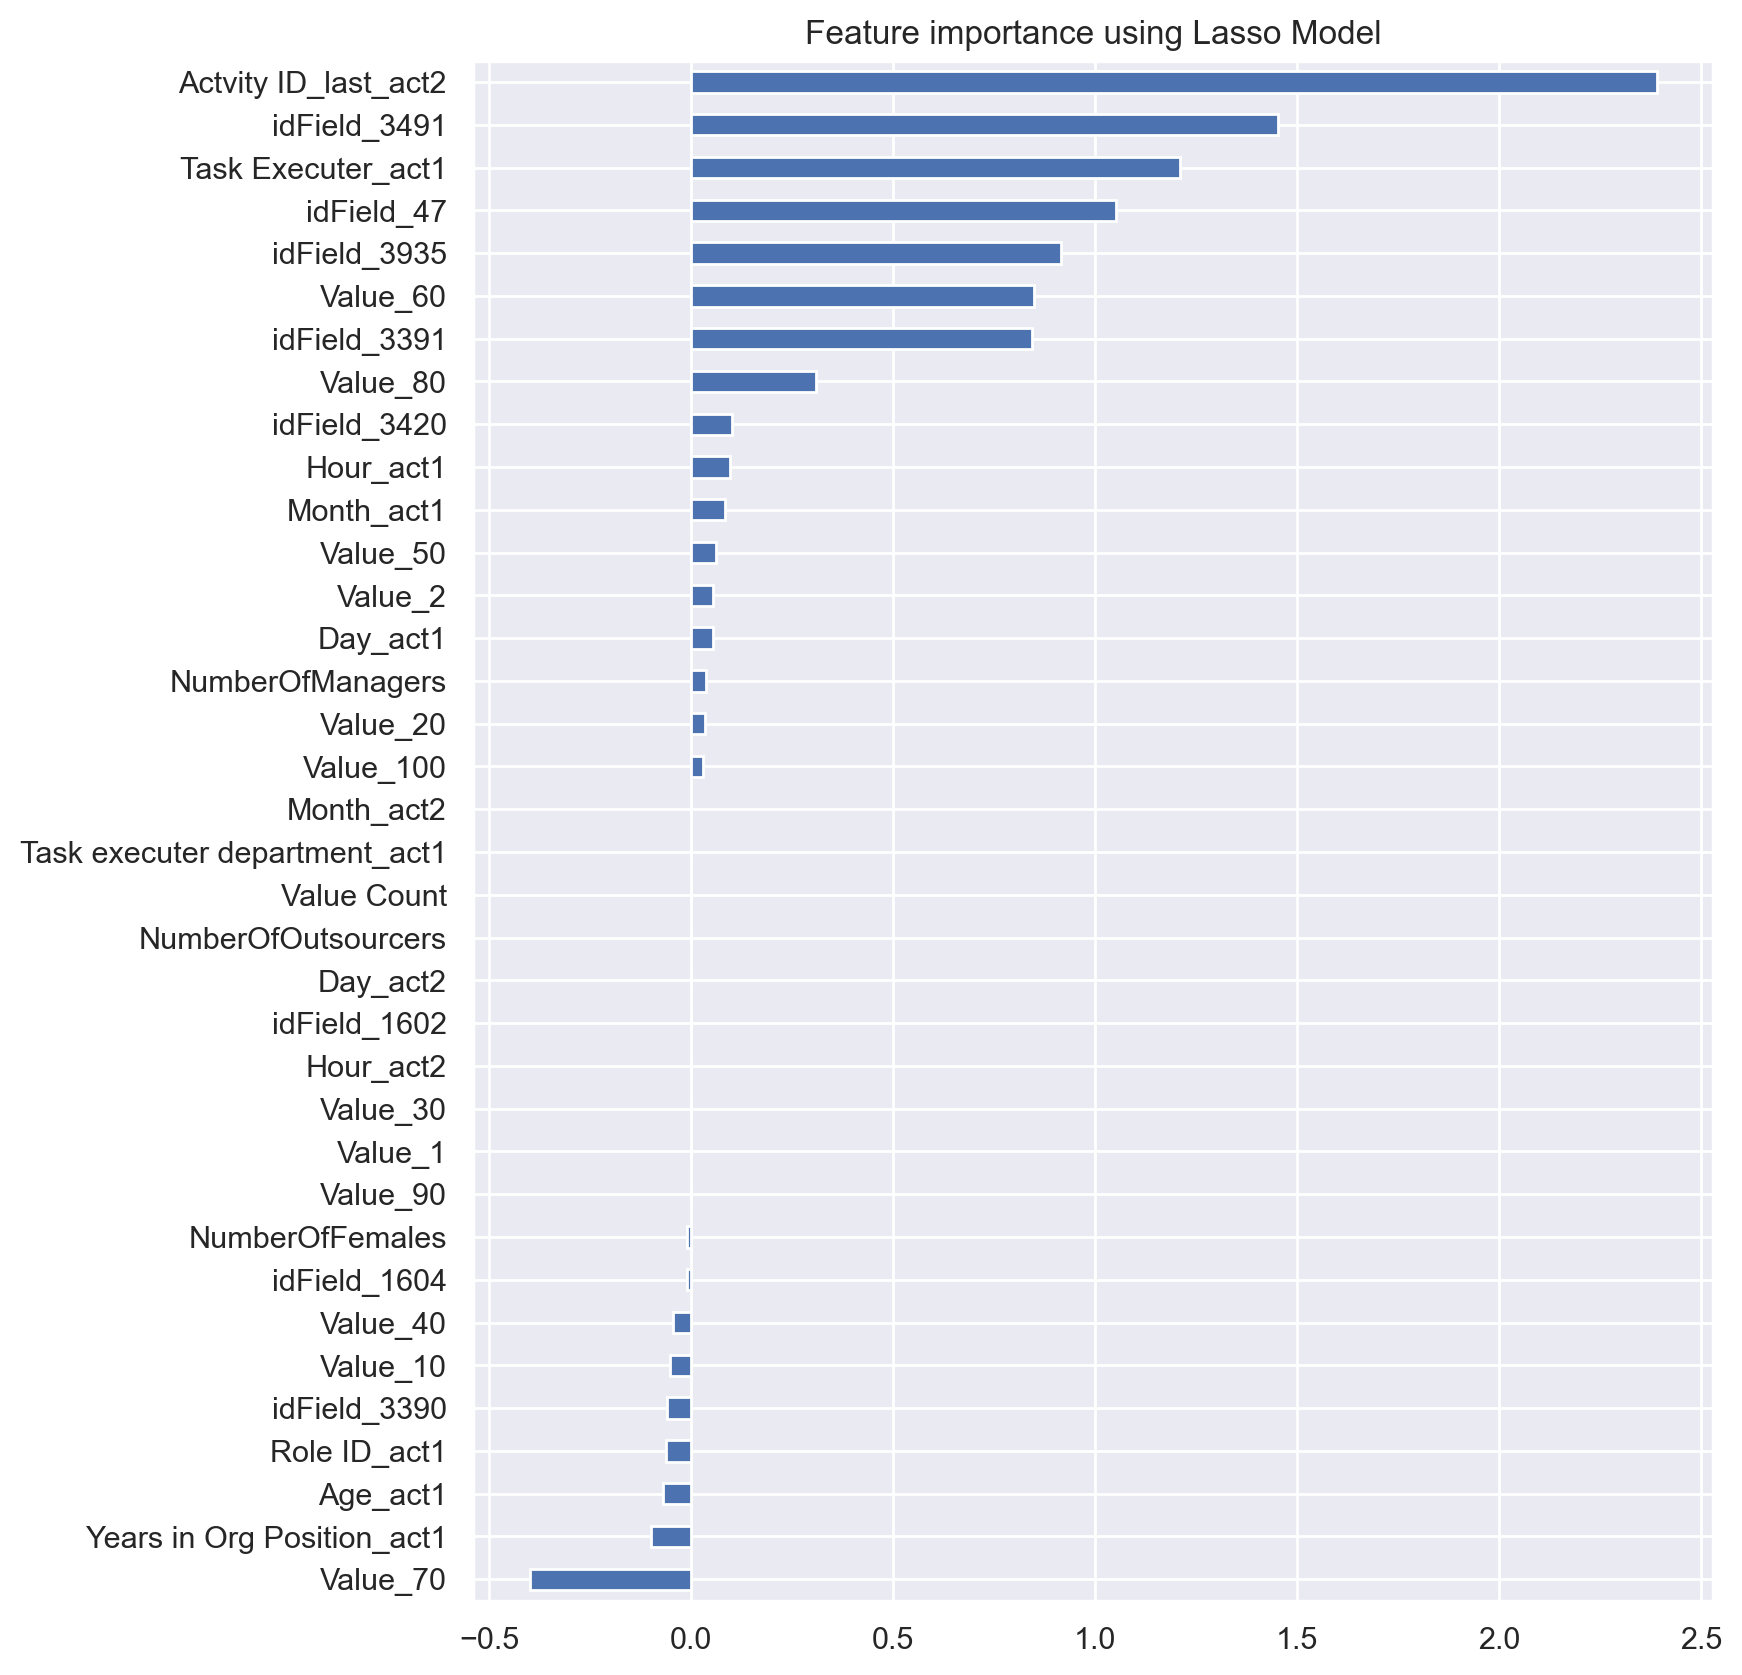

In [53]:
#Feature importance for the model prediction
plot_importance(coef,'Lasso')

In [54]:
#Variables to eliminate using Lasso 
selected_variables = (coef >= -0.05) & (coef <= 0.05)
lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['Task executer department_act1', 'NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers', 'Value Count', 'idField_1602', 'idField_1604', 'Value_30', 'Value_20', 'Value_100', 'Value_40', 'Value_1', 'Value_90', 'Month_act2', 'Hour_act2', 'Day_act2']


### Decision Tree

Decision Trees work by recursively splitting the data based our features, aiming to create clear and interpretable rules that capture the patterns in our dataset. The feature importances obtained from a Decision Tree tell us how much each feature contributes to the decision-making process.

Task Executer_act1: 0.06
Task executer department_act1: 0.161
Role ID_act1: 0.018
Years in Org Position_act1: 0.027
Age_act1: 0.044
NumberOfFemales: 0.009
NumberOfManagers: 0.0
NumberOfOutsourcers: 0.0
Value Count: 0.056
idField_3391: 0.0
idField_3390: 0.003
idField_3491: 0.009
idField_3420: 0.017
idField_3935: 0.005
idField_47: 0.243
idField_1602: 0.0
idField_1604: 0.0
Value_10: 0.025
Value_50: 0.019
Value_30: 0.015
Value_70: 0.009
Value_20: 0.016
Value_100: 0.013
Value_60: 0.006
Value_2: 0.0
Value_40: 0.006
Value_1: 0.0
Value_80: 0.004
Value_90: 0.008
Actvity ID_last_act2: 0.015
Month_act1: 0.037
Hour_act1: 0.028
Day_act1: 0.043
Month_act2: 0.028
Hour_act2: 0.029
Day_act2: 0.045


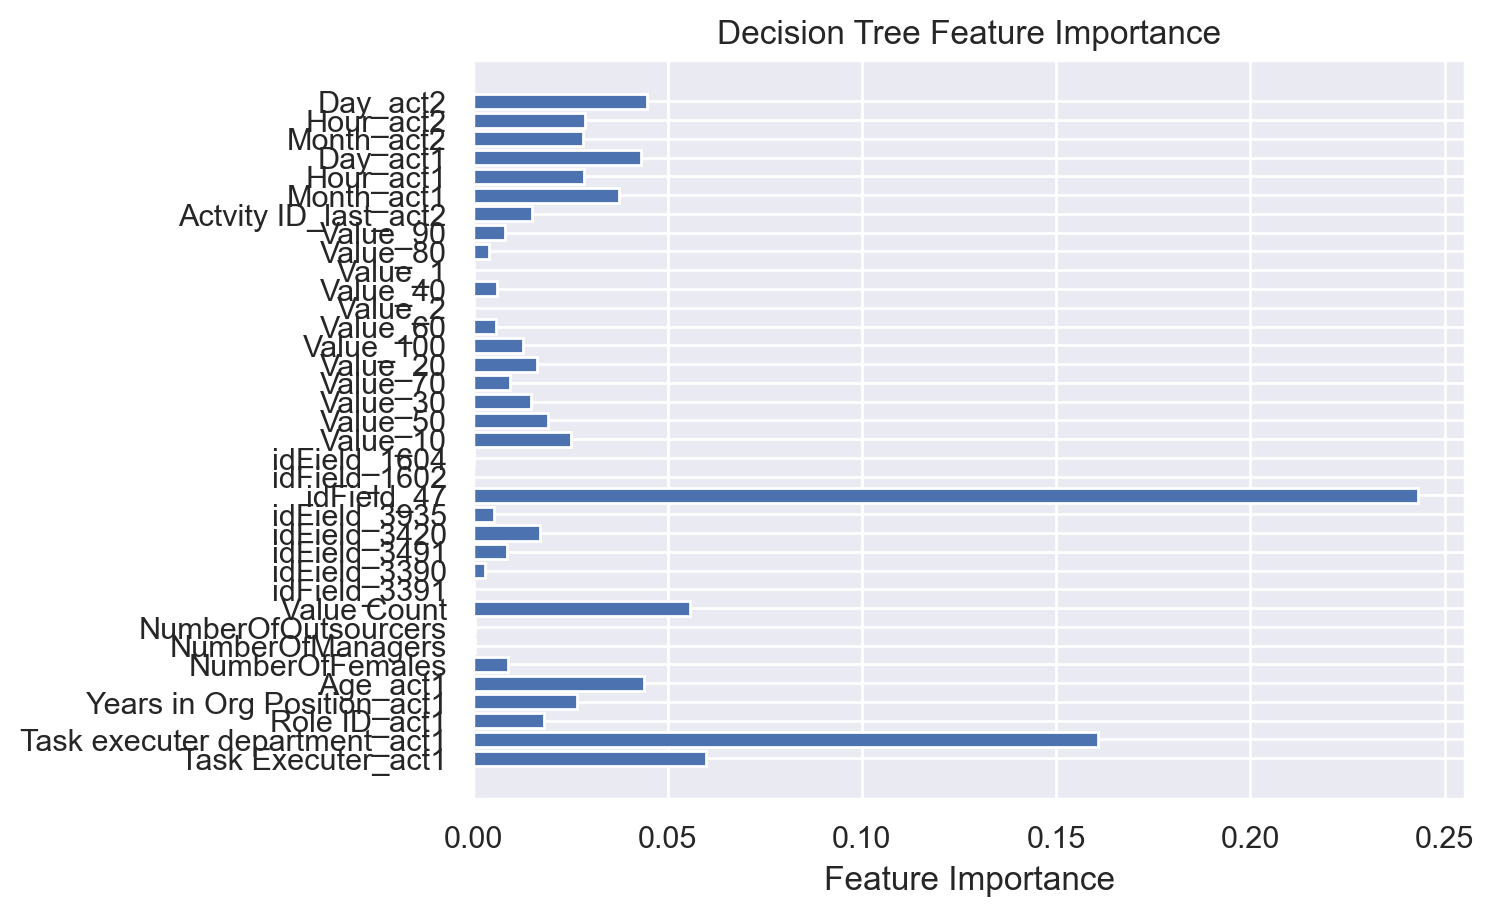

In [55]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_smote, y_smote)

#Get feature importances
feature_importances = clf.feature_importances_

decision_tree_eliminate = []

#Print feature importances
for feature, importance in zip(X_smote.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.025:
        decision_tree_eliminate.append(feature)

plt.barh(X_smote.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [56]:
#List with features to eliminate 
decision_tree_eliminate

['Role ID_act1',
 'NumberOfFemales',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'idField_3391',
 'idField_3390',
 'idField_3491',
 'idField_3420',
 'idField_3935',
 'idField_1602',
 'idField_1604',
 'Value_50',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_60',
 'Value_2',
 'Value_40',
 'Value_1',
 'Value_80',
 'Value_90',
 'Actvity ID_last_act2']

<a class="anchor" id="selectfin">

#### Final Feature Selection
###### [Go back to Contents](#top)
</a>

Finally, we developed a votting system. If the variable was eliminated for at least 3 of the methods used, then we will drop it.

In [57]:
#Combine all the lists into one list
all_eliminate = (
    rfe_eliminate
    + lasso_eliminate
    + spearman_eliminate 
    + decision_tree_eliminate)

element_counts = Counter(all_eliminate)

#Minimum number of lists an element should appear in to drop it
min_appearances = 3

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]
print(common_elements)

['NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers', 'idField_3390', 'idField_3420', 'idField_1602', 'idField_1604', 'Value_50', 'Value_30', 'Value_70', 'Value_20', 'Value_100', 'Value_40', 'Value_1', 'Value_90', 'Month_act2', 'Hour_act2', 'Day_act2']


In [58]:
#Droping the variables in all necessary dataframes
X_train.drop(common_elements, axis=1, inplace=True)
X_val.drop(common_elements, axis=1, inplace=True)
X_smote.drop(common_elements, axis=1, inplace=True)

In [59]:
#Checking how many columns were left 
len(X_smote.columns)

18

In [60]:
#Which columns were left 
X_smote.columns

Index(['Task Executer_act1', 'Task executer department_act1', 'Role ID_act1',
       'Years in Org Position_act1', 'Age_act1', 'Value Count', 'idField_3391',
       'idField_3491', 'idField_3935', 'idField_47', 'Value_10', 'Value_60',
       'Value_2', 'Value_80', 'Actvity ID_last_act2', 'Month_act1',
       'Hour_act1', 'Day_act1'],
      dtype='object')

<a class="anchor" id="base">

#### Baseline Modeling
###### [Go back to Contents](#top)
</a>

Now, we reached the modelling phase. Firstly we are going to see the results on our train set with 2 simple and not yet tunned models.

In [47]:
#Multiclass scoring metric
scoring_metric = make_scorer(f1_score, average='weighted')

#List of classifiers
clf_list = [('Gaussian Naive Bayes', GaussianNB()),
            ('Logistic Regression', LogisticRegression(random_state=42))]

cv_base_mean, cv_std = [], []
for clf in clf_list:

    cv = cross_val_score(estimator=clf[1],
                         X=X_smote,
                         y=y_smote,
                         scoring=scoring_metric,
                         cv=5,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (Weighted Recall):')

for i in range(len(clf_list)):
    print('   {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Weighted Recall):
   Gaussian Naive Bayes: 0.49
   Logistic Regression: 0.75


<a class="anchor" id="tun">

#### Model Tunning
###### [Go back to Contents](#top)
</a>

To find the best parameters for the Models we are going to use Random Search. Unlike GridSearch, instead of systematically checking every possible combination, it randomly selects configurations to try out sees the model performance wity those parameters. This approach is normally more efficient and less computationally intensive, especially when the search space is large.

### Functions 

In [61]:
#Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

### Logistic Regression

Logistics Regression uses Logistic function to map inputs to probabilities between 0 and 1, making it widely used for its simplicity and interpretability.

In [49]:
#Logistic Regression classifier
lr = LogisticRegression(random_state=42)

#Search Space 
param_distributions = {
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 20 values between 1e-4 and 1e4
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10),  # Only useful if penalty is 'elasticnet'
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lr_clf = RandomizedSearchCV(estimator=lr,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=100,  # Number of parameter settings sampled
                            n_jobs=-1,
                            random_state=45)

#Fit the RandomizedSearchCV object to the training data
best_lr_clf = lr_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lr_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'l1_ratio': 0.0, 'class_weight': 'balanced', 'C': 0.615848211066026}

Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'l1_ratio': 0.0, 'class_weight': 'balanced', 'C': 0.615848211066026}


In [62]:
#Defining the model with the best parameters found
lr_best = LogisticRegression(
    solver='liblinear', 
    penalty='l1', 
    max_iter=200, 
    l1_ratio=0.0, 
    C=0.615848211066026, 
    class_weight='balanced',
    random_state=42
)

#Fit the new Logistic Regression model with the best parameters
lr_fit = lr_best.fit(X_smote, y_smote)
lr_pred_train = lr_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lr_pred_train)

print('f1_train:', f1_score(y_smote, lr_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1051
           1       0.98      0.74      0.85      6249
           2       0.70      0.80      0.75     13739
           3       0.68      0.65      0.67     10475

    accuracy                           0.75     31514
   macro avg       0.84      0.78      0.80     31514
weighted avg       0.76      0.75      0.75     31514

[[  975     2    30    44]
 [    1  4646  1176   426]
 [    7    11 11042  2679]
 [    9    69  3560  6837]]
f1_train: 0.75


### SVC

SVC aims to find the best hyperplane separating classes of the target variable. By maximizing the margin between classes, it handles linear and non-linear data using kernel functions.

In [51]:
#Define the SVC classifier
svc = SVC(probability=True, random_state=42)

#Define the expanded parameter grid (Search Space)
param_distributions = {
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  
    'C': np.logspace(-2, 2, 5),  
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
svc_clf = RandomizedSearchCV(estimator=svc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=3,
                             verbose=False,
                             n_iter=3,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_svc_clf = svc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_svc_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10.0}

Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10.0}


In [57]:
#Defining the model with the best parameters found
svc_best = SVC(kernel='rbf',
               gamma= 'scale',
               C= 10.0,
               probability=True,
               class_weight='balanced',
               random_state=42)

#Fit the new Logistic Regression model with the best parameters
svc_fit = svc_best.fit(X_smote, y_smote)
svc_pred_train = svc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, svc_pred_train)

print('f1_train:', f1_score(y_smote, svc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1051
           1       0.91      0.80      0.85      6249
           2       0.72      0.83      0.77     13739
           3       0.72      0.61      0.66     10475

    accuracy                           0.76     31514
   macro avg       0.81      0.80      0.80     31514
weighted avg       0.76      0.76      0.76     31514

[[ 1000     4    26    21]
 [   33  4997   818   401]
 [    0   192 11431  2116]
 [   76   277  3689  6433]]
f1_train: 0.76


### Random Forest 

In [50]:
#Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': np.arange(5, 21, 5),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
rf_clf = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=35,  
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_rf_clf = rf_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_rf_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 
#                                              'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}

Best parameters found by RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}


In [66]:
#Define the best Random Forest model
rf_best = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=20,
    criterion='gini',
    bootstrap=False,
    class_weight='balanced',
    random_state=42
)


#Fit the new Random Forest model with the best parameters
rf_fit = rf_best.fit(X_smote, y_smote)
rf_pred_train = rf_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, rf_pred_train)

print('f1_train:', f1_score(y_smote, rf_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1051
           1       0.97      0.97      0.97      6249
           2       0.95      0.93      0.94     13739
           3       0.91      0.93      0.92     10475

    accuracy                           0.94     31514
   macro avg       0.95      0.96      0.95     31514
weighted avg       0.94      0.94      0.94     31514

[[ 1051     0     0     0]
 [    1  6046    94   108]
 [    7    75 12822   835]
 [    7   129   629  9710]]
f1_train: 0.94


### Gradient Boost

Gradient Boosting builds models sequentially. Each new model corrects the errors of the previous ones, combining them for better accuracy. At the end, for classification tasks it uses weighted voting to determine the final class label of the target variable.

In [53]:
#Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=15)

#Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 600, 1000],
    'subsample': [0.66, 0.75, 0.85, 1.0],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],  # default=3
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_iter_no_change': [10, 20, 30],
    'validation_fraction': [0.1, 0.2, 0.3],
    'tol': [0.0001, 0.001, 0.01]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
gbc_clf = RandomizedSearchCV(estimator=gbc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=35,  # Number of parameter settings sampled
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_gbc_clf = gbc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_gbc_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.0001, 'subsample': 0.66, 'n_iter_no_change': 30, 
#                                              'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 
#                                              'max_depth': 5, 'learning_rate': 0.1}

Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.0001, 'subsample': 0.66, 'n_iter_no_change': 30, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}


In [67]:
#Model with the best parameters
gbc_best = GradientBoostingClassifier(
    validation_fraction=0.1,
    tol=0.0001,
    subsample=0.66,
    n_iter_no_change=30,
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

#Fit the new Gradient Boosting Classifier model with the best parameters
gbc_fit=gbc_best.fit(X_smote, y_smote)
gbc_pred_train = gbc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, gbc_pred_train)

#Print F1 score for the training set
print('f1_train:', f1_score(y_smote, gbc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1051
           1       0.96      0.87      0.92      6249
           2       0.84      0.89      0.86     13739
           3       0.81      0.80      0.80     10475

    accuracy                           0.86     31514
   macro avg       0.90      0.89      0.89     31514
weighted avg       0.86      0.86      0.86     31514

[[ 1039     0     5     7]
 [    1  5464   359   425]
 [    0    64 12206  1469]
 [    1   151  1987  8336]]
f1_train: 0.86


### XGBOOST

XGBOOST is an advanced implementation of gradient boosting designed for speed and performance. It builds models sequentially, with each new model correcting the errors of the previous ones.

In [54]:
#Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.logspace(-3, 0, 10),  # Values between 0.001 and 1
    'max_depth': np.arange(3, 11),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': np.arange(1, 11)
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
xgb_clf = RandomizedSearchCV(estimator=xgb,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=35,  
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_xgb_clf = xgb_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_xgb_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.8888888888888888, 'reg_alpha': 0.5555555555555556,
#'n_estimators': 100, 'min_child_weight': 9, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}

Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.8888888888888888, 'reg_alpha': 0.5555555555555556, 'n_estimators': 100, 'min_child_weight': 9, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}


In [65]:
#Model with the best parameters
xgb_best = XGBClassifier(
    subsample=0.6,
    reg_lambda=0.8888888888888888,
    reg_alpha=0.5555555555555556,
    n_estimators=100,
    min_child_weight=9,
    max_depth=10,
    learning_rate=0.1,
    gamma=0.0,
    colsample_bytree=0.8,
    random_state=42
)

#Fit the new XGBoost model with the best parameters
xgb_fit = xgb_best.fit(X_smote, y_smote)
xgb_pred_train = xgb_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, xgb_pred_train)

print('f1_train:', f1_score(y_smote, xgb_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1051
           1       0.96      0.85      0.90      6249
           2       0.84      0.90      0.87     13739
           3       0.82      0.80      0.81     10475

    accuracy                           0.86     31514
   macro avg       0.90      0.87      0.88     31514
weighted avg       0.86      0.86      0.86     31514

[[  966     7    32    46]
 [    0  5317   433   499]
 [    4    67 12306  1362]
 [    2   159  1908  8406]]
f1_train: 0.86


### LightGBM

LightGBM is a fast, high-performance implementation of gradient boosting. It builds models sequentially, optimizing for speed and memory efficiency by using a histogram-based method in which data is bucketed into bins using a histogram of the distributions. In classification, it uses weighted voting to determine the final class label.

In [55]:
#Define the LGBMClassifier
lgbmc = LGBMClassifier(random_state=42)

#Define the parameter grid
param_distributions = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5],
    'class_weight':['balanced']
}

#Sscoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lgbmc_clf = RandomizedSearchCV(estimator=lgbmc,
                               param_distributions=param_distributions,
                               scoring=scoring_metric,
                               cv=5,
                               verbose=False,
                               n_iter=35,  
                               n_jobs=-1,
                               random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lgbmc_clf = lgbmc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lgbmc_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 10,
#'n_estimators': 200, 'min_child_samples': 10, 'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 0.5, 'class_weight': 'balanced'}


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 18
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [64]:
#Model with the best parameters
lgbmc_best = LGBMClassifier(
    reg_lambda=0.5,
    reg_alpha=0.1,
    num_leaves=10,
    n_estimators=200,
    min_child_samples=10,
    max_depth=5,
    learning_rate=0.01,
    feature_fraction=0.5,
    class_weight='balanced',
    random_state=42
)


#Fit the new LGBM model with the best parameters
lgbmc_fit = lgbmc_best.fit(X_smote, y_smote)
lgbmc_pred_train = lgbmc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lgbmc_pred_train)

print('f1_train:', f1_score(y_smote, lgbmc_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 18
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

### Ensamble

Voting classifiers are ensemble methods that combine multiple different models to improve classification performance. We are using Soft Voting ensemble, where the final class label is determined by the weighted average of predicted probabilities from the models used.

In [62]:
#Define the estimators for the soft voting ensemble
estimators = [
    ('rf', rf_fit),
    ('gb', gbc_fit),
    ('xgb', xgb_fit),
    ('lgbm', lgbmc_fit),
    ('lr', lr_fit),
    ('svc', svc_fit)
]

#Create the soft voting ensemble
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

#Fit the ensemble to the training data
ensemble_model=soft_voting_clf.fit(X_smote, y_smote)

#Predict on the training set
soft_voting_pred_train = ensemble_model.predict(X_smote)

#Assess the ensemble's performance on the training set
metrics(y_smote, soft_voting_pred_train)

print('f1_train:', f1_score(y_smote, soft_voting_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 18
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

<a class="anchor" id="impor">

### Models Feature Importance
###### [Go back to Contents](#top)
</a>

In this section, we will examine the variables that contributed most significantly to predicting the target variable in each model

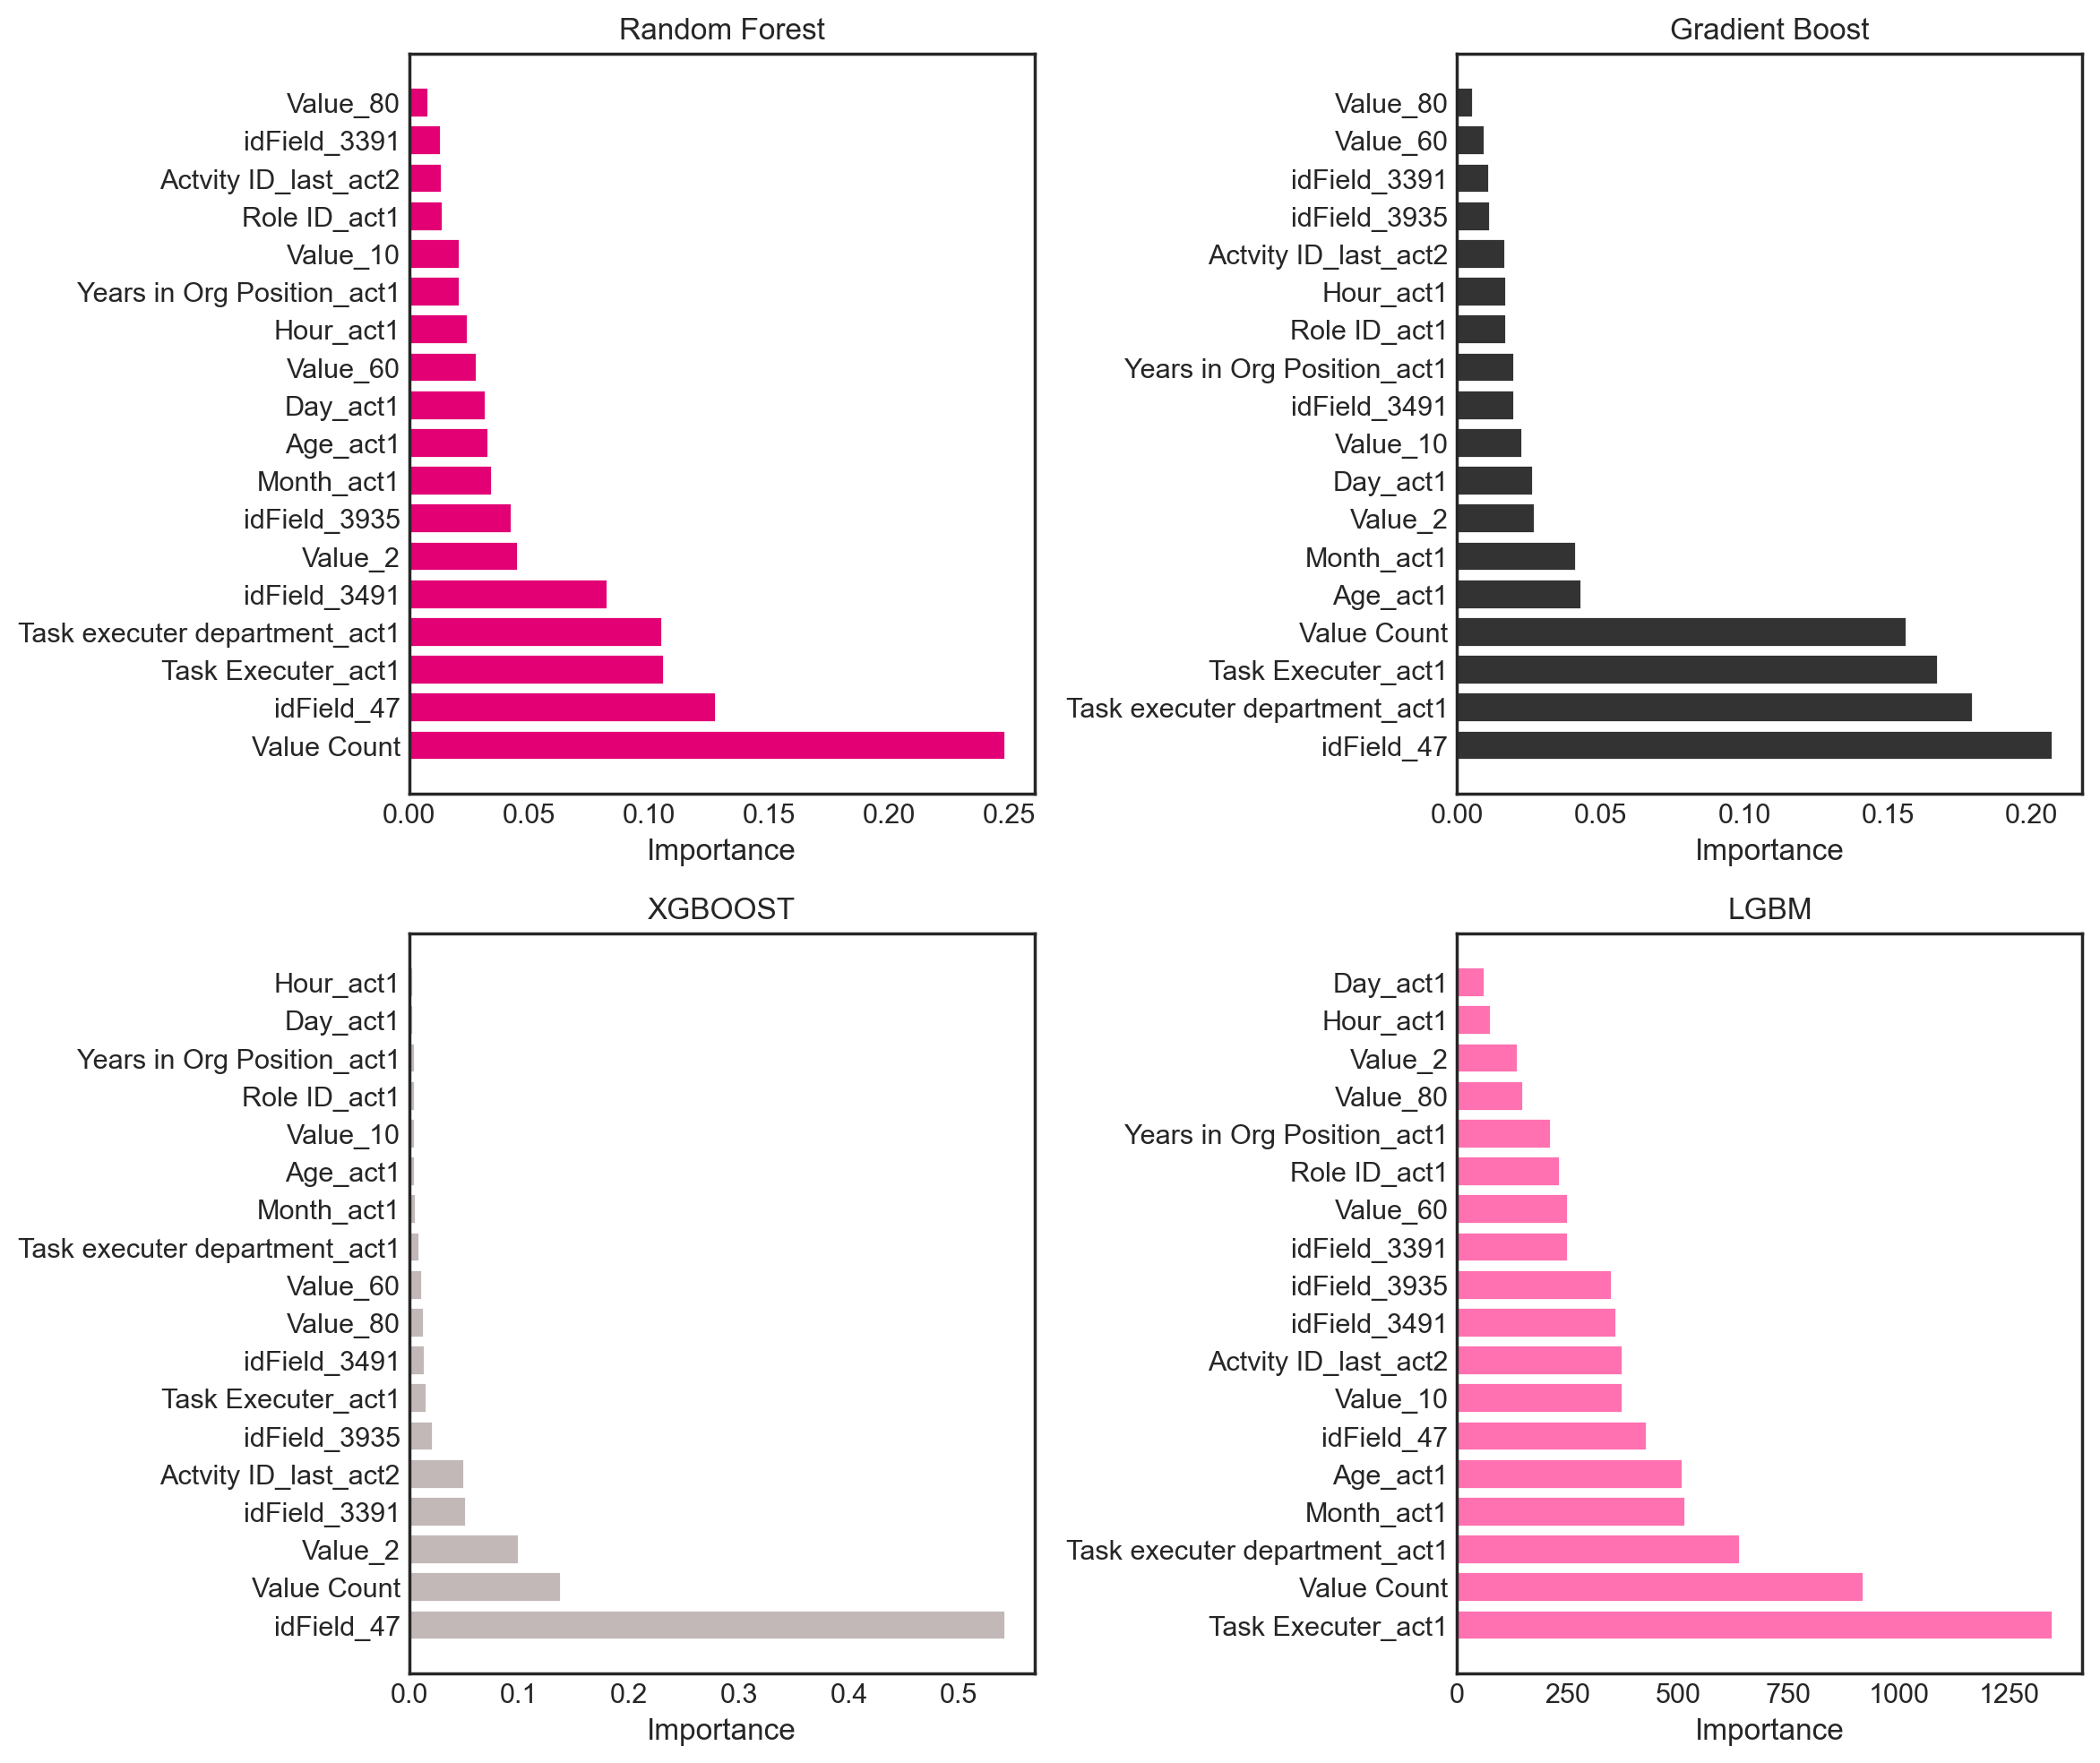

In [68]:
#Set white background
plt.style.use("seaborn-v0_8-white")

#Define the models and their names
models = {
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'XGBOOST': xgb_fit,
    'LGBM': lgbmc_fit
}

#Define custom colors
colors = {"magenta": "#E20074", "dark_gray": "#333333", "light_gray": "#C1B8B7", "pink": "#FF71B1"}

#Assuming X_smote is a DataFrame, get the feature names
feature_names = X_smote.columns if hasattr(X_smote, 'columns') else [f'Feature {i}' for i in range(X_smote.shape[1])]

#Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Plot feature importance for each model
for ax, (name, model), color in zip(axs.flatten(), models.items(), colors.values()):
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_names = np.array(feature_names)[sorted_indices]
    
    ax.barh(range(X_smote.shape[1]), feature_importance[sorted_indices], color=color)
    ax.set_yticks(range(X_smote.shape[1]))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_title(name)
    ax.set_xlabel('Importance')

plt.tight_layout()
plt.show()

As we can see the number of diferent values that were inserted in the inicial form (Value Count) is allways in the top 3 of most significant variables to predict the outcome. The person who handles the first activity of the process is also important to estimate the outcome for the LGBM, Random Forest and Gradient Boosting models, being in the top 3 for this models as well. For the 4 models, we can add that filling the idFields 47 also seems relevant, as from all the fields, they are the ones with higher importance across 3 models.

<a class="anchor" id="TRAIN">

### Train Metrics Comparison 

###### [Go back to Contents](#top)
</a>

Here we can compare the diferent models performance on the train dataset using Precision, Recall and F1_score.
- Precision measures the proportion of correctly predicted positive instances (true positives) among all instances predicted as positive (true positives + false positives).
- Recall measures the proportion of correctly predicted positive instances (true positives) among all actual positive instances (true positives + false negatives). It focuses on the ability of the classifier to find all the positive instances.
- The F1 Score provides a single score that balances both precision and recall. It reaches its best value at 1 and worst at 0. It is a useful metric when we want to find a balance between precision and recall, especially when there is an uneven class distribution, that is our projects case.

In [64]:
#Our models definition
models = {
    'Logistic Regression': lr_fit,
    'SVC': svc_fit,
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'LGBM': lgbmc_fit,
    'Ensemble': ensemble_model,
    'XGBOOST': xgb_fit,
}

#Initialize empty lists to store metrics
precision = []
recall = []
f1 = []

#Calculate metrics for each model
for name, model in models.items():
    pred_train = model.predict(X_smote)
    
    precision_score_train = precision_score(y_smote, pred_train, average='weighted')
    recall_score_train = recall_score(y_smote, pred_train, average='weighted')
    f1_score_train = f1_score(y_smote, pred_train, average='weighted')

    precision.append(precision_score_train)
    recall.append(recall_score_train)
    f1.append(f1_score_train)

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': list(models.keys()),
                           'Weighted Precision': precision,
                           'Weighted Recall': recall,
                           'Weighted F1 Score': f1})

metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,Logistic Regression,0.759732,0.745700,0.747671
1,SVC,0.761745,0.757156,0.755461
2,Random Forest,0.940364,0.940185,0.940231
3,Gradient Boost,0.860294,0.858190,0.858476
4,LGBM,0.756312,0.754363,0.755014
5,Ensemble,0.843313,0.839310,0.839730
6,XGBOOST,0.859528,0.856603,0.856958


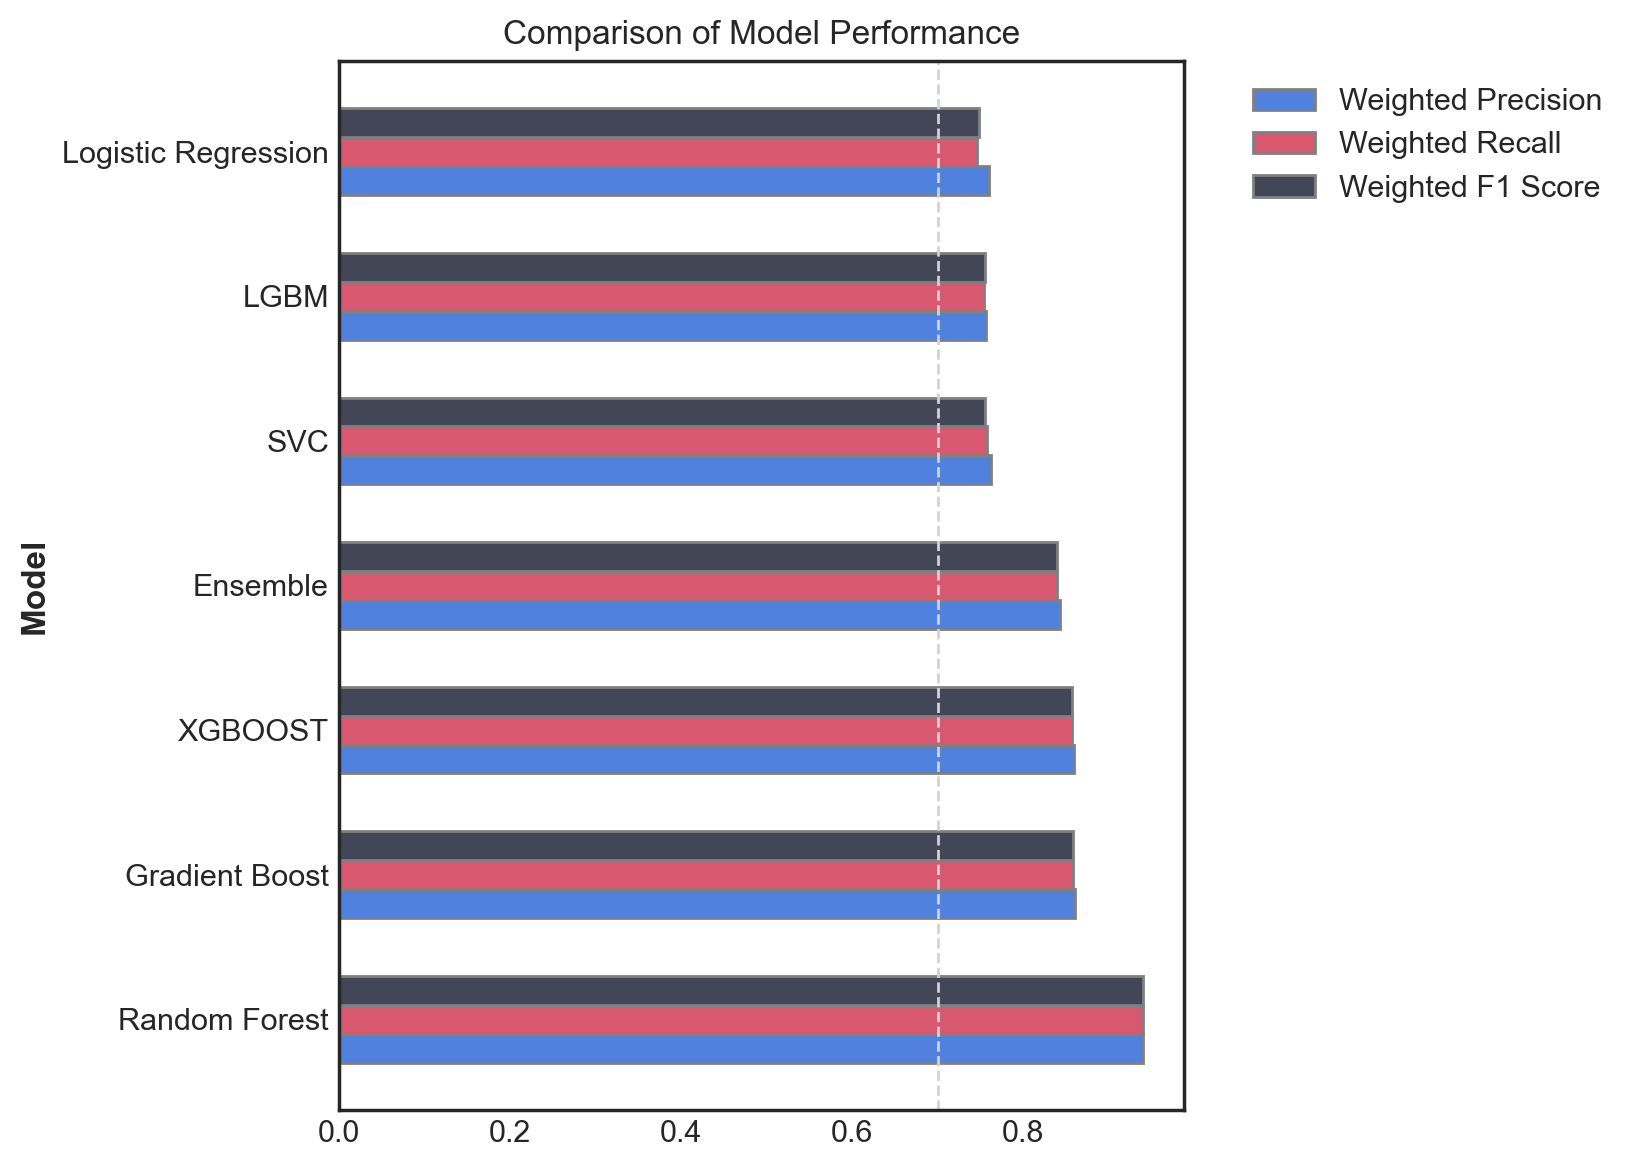

In [68]:
#Sort the DataFrame by 'Weighted F1 Score' in descending order
metrics_df = metrics_df.sort_values(by='Weighted F1 Score', ascending=False)

#Set the width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars horizontally
ax.barh(r1, metrics_df['Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Weighted Precision')
ax.barh(r2, metrics_df['Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Weighted Recall')
ax.barh(r3, metrics_df['Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Weighted F1 Score')

#Add a light grey ticked line at 0.65
ax.axvline(x=0.7, color='lightgrey', linestyle='dashed', linewidth=1)

#Add yticks on the middle of the group bars
ax.set_ylabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(metrics_df))])
ax.set_yticklabels(metrics_df['Model'])

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()

<a class="anchor" id="VAL">

### Validation Implementation

###### [Go back to Contents](#top)
</a>

In this section we are going to repeat the process for the validation dataset

In [66]:
#Initialize lists to store metrics for validation set
val_precision = []
val_recall = []
val_f1 = []

#Calculate metrics for each model on validation set
for name, model in models.items():
    pred_val = model.predict(X_val)
    
    precision_val = precision_score(y_val, pred_val, average='weighted')
    recall_val = recall_score(y_val, pred_val, average='weighted')
    f1_val = f1_score(y_val, pred_val, average='weighted')

    val_precision.append(precision_val)
    val_recall.append(recall_val)
    val_f1.append(f1_val)

#Create a DataFrame to store the metrics for validation set
val_metrics_df = pd.DataFrame({'Model': list(models.keys()),
                               'Val Weighted Precision': val_precision,
                               'Val Weighted Recall': val_recall,
                               'Val Weighted F1 Score': val_f1})

#Print the DataFrame
val_metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Val Weighted Precision,Val Weighted Recall,Val Weighted F1 Score
0,Logistic Regression,0.740469,0.725772,0.727669
1,SVC,0.736341,0.732361,0.729695
2,Random Forest,0.791163,0.789443,0.789969
3,Gradient Boost,0.794888,0.791886,0.792012
4,LGBM,0.731645,0.730436,0.730771
5,Ensemble,0.781936,0.776708,0.777031
6,XGBOOST,0.798065,0.794107,0.794667


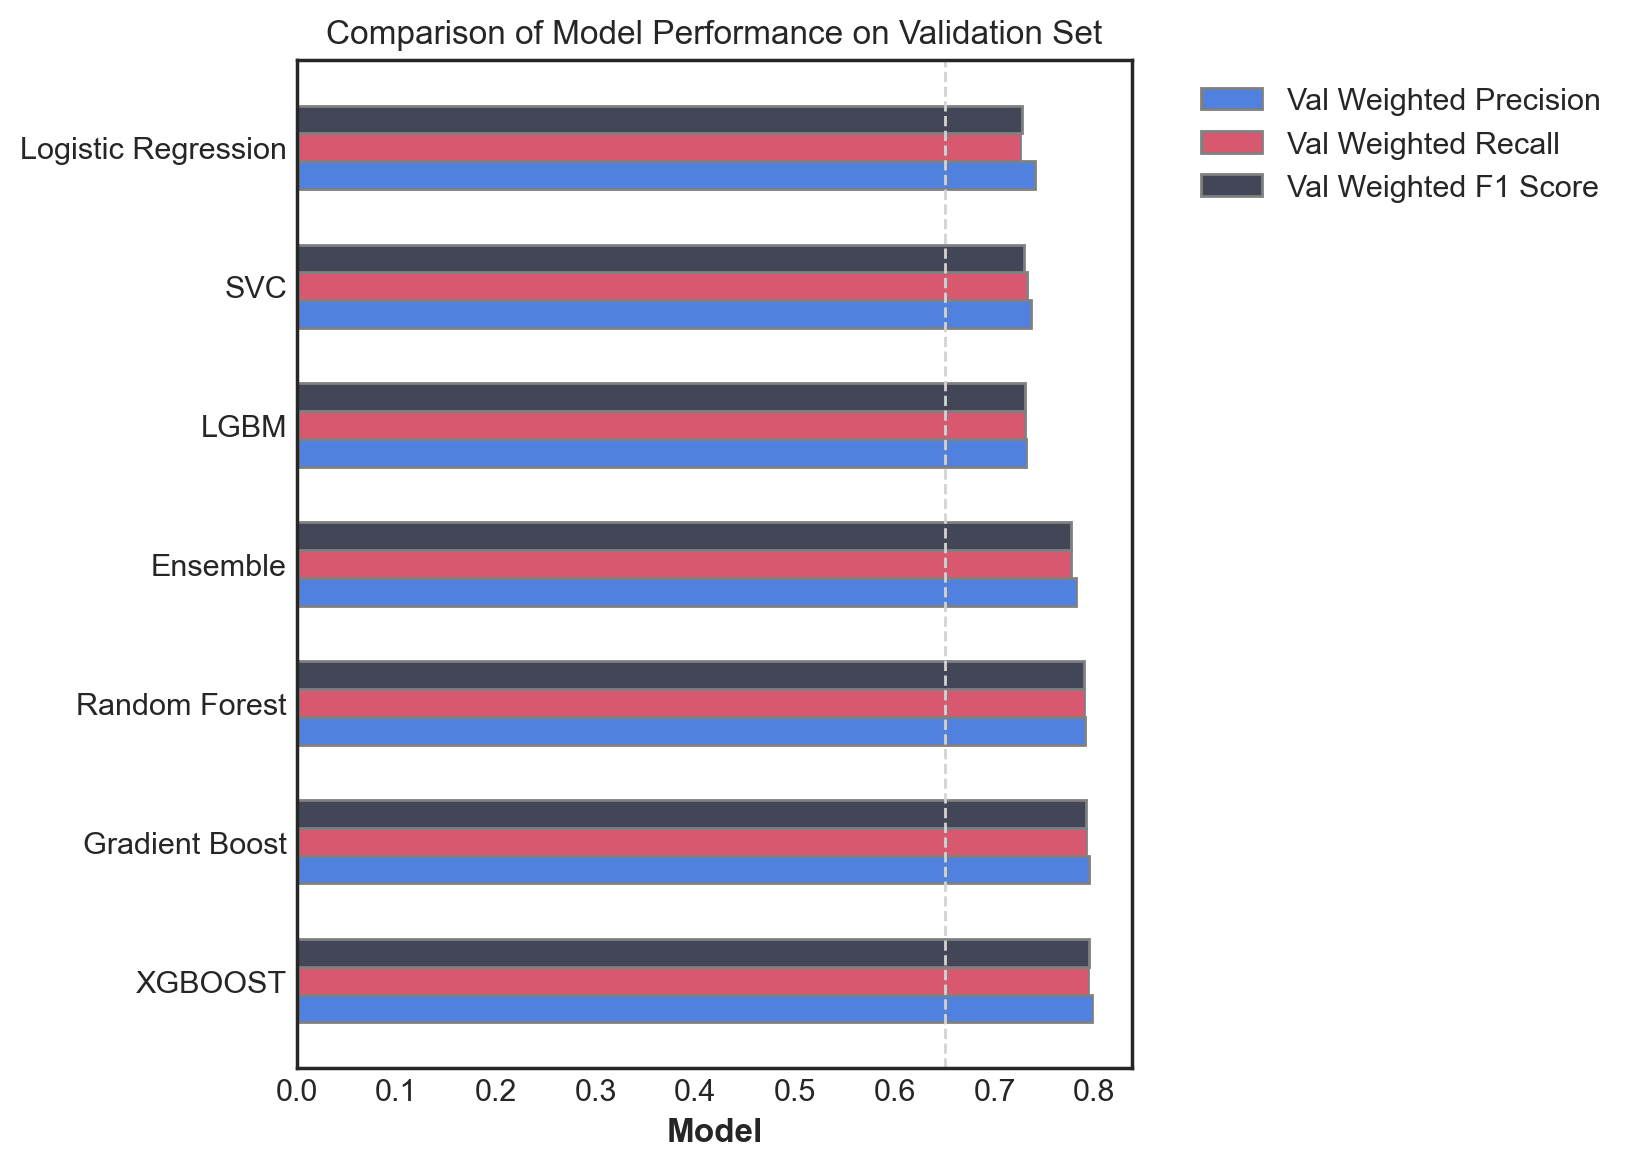

In [67]:
#Sort the DataFrame by 'Val Weighted F1 Score' in descending order
val_metrics_df = val_metrics_df.sort_values(by='Val Weighted F1 Score', ascending=False)

#width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(val_metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis for validation set
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars for validation set
ax.barh(r1, val_metrics_df['Val Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Val Weighted Precision')
ax.barh(r2, val_metrics_df['Val Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Val Weighted Recall')
ax.barh(r3, val_metrics_df['Val Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Val Weighted F1 Score')

#Add a light grey ticked line at 0.65
ax.axvline(x=0.7, color='lightgrey', linestyle='dashed', linewidth=1)

#Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(val_metrics_df))])
ax.set_yticklabels(val_metrics_df['Model'])

#legend
ax.legend()

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot for validation set
plt.title('Comparison of Model Performance on Validation Set')
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

<a class="anchor" id="fin">

### Final Model Selection

###### [Go back to Contents](#top)
</a>

We will select the final model based on two criteria: firstly, the model with the least amount of overfitting, indicated by the closest F1 score between the training and validation sets, since we want a model that generalizes well on unseen data. Secondly, prioritizing the model with the highest F1 score on the validation set. We choose F1 score as our primary metric because it effectively evaluates model performance in imbalanced classification problems.

In [69]:
#Calculate the differences between train and validation F1 scores
f1_diff = [abs(train - val) for train, val in zip(f1, val_f1)]

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Precision': precision,
    'Train Recall': recall,
    'Train F1 Score': f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Validation F1 Score': val_f1,
    'F1 Score Difference': f1_diff
})

#Sort the DataFrame by F1 Score Difference (ascending) and Validation F1 Score (descending)
metrics_df.sort_values(by=['F1 Score Difference', 'Validation F1 Score'], ascending=[True, False], inplace=True)

#Select the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model_metrics = metrics_df.iloc[0]

#Print the best model and its scores
print(f"The best model is {best_model_name}")
print(f"Train F1 Score: {best_model_metrics['Train F1 Score']}")
print(f"Validation F1 Score: {best_model_metrics['Validation F1 Score']}")
print(f"F1 Score Difference: {best_model_metrics['F1 Score Difference']}")

#Display the DataFrame
metrics_df

The best model is Logistic Regression
Train F1 Score: 0.7476712332195263
Validation F1 Score: 0.7276689222857021
F1 Score Difference: 0.020002310933824208


,Model,Train Precision,Train Recall,Train F1 Score,Validation Precision,Validation Recall,Validation F1 Score,F1 Score Difference
0,Logistic Regression,0.759732,0.745700,0.747671,0.740469,0.725772,0.727669,0.020002
4,LGBM,0.756312,0.754363,0.755014,0.731645,0.730436,0.730771,0.024243
1,SVC,0.761745,0.757156,0.755461,0.736341,0.732361,0.729695,0.025765
6,XGBOOST,0.859528,0.856603,0.856958,0.798065,0.794107,0.794667,0.062291
5,Ensemble,0.843313,0.839310,0.839730,0.781936,0.776708,0.777031,0.062699
3,Gradient Boost,0.860294,0.858190,0.858476,0.794888,0.791886,0.792012,0.066464
2,Random Forest,0.940364,0.940185,0.940231,0.791163,0.789443,0.789969,0.150261


<a class="anchor" id="int">

### Final Model Interpretation

###### [Go back to Contents](#top)
</a>

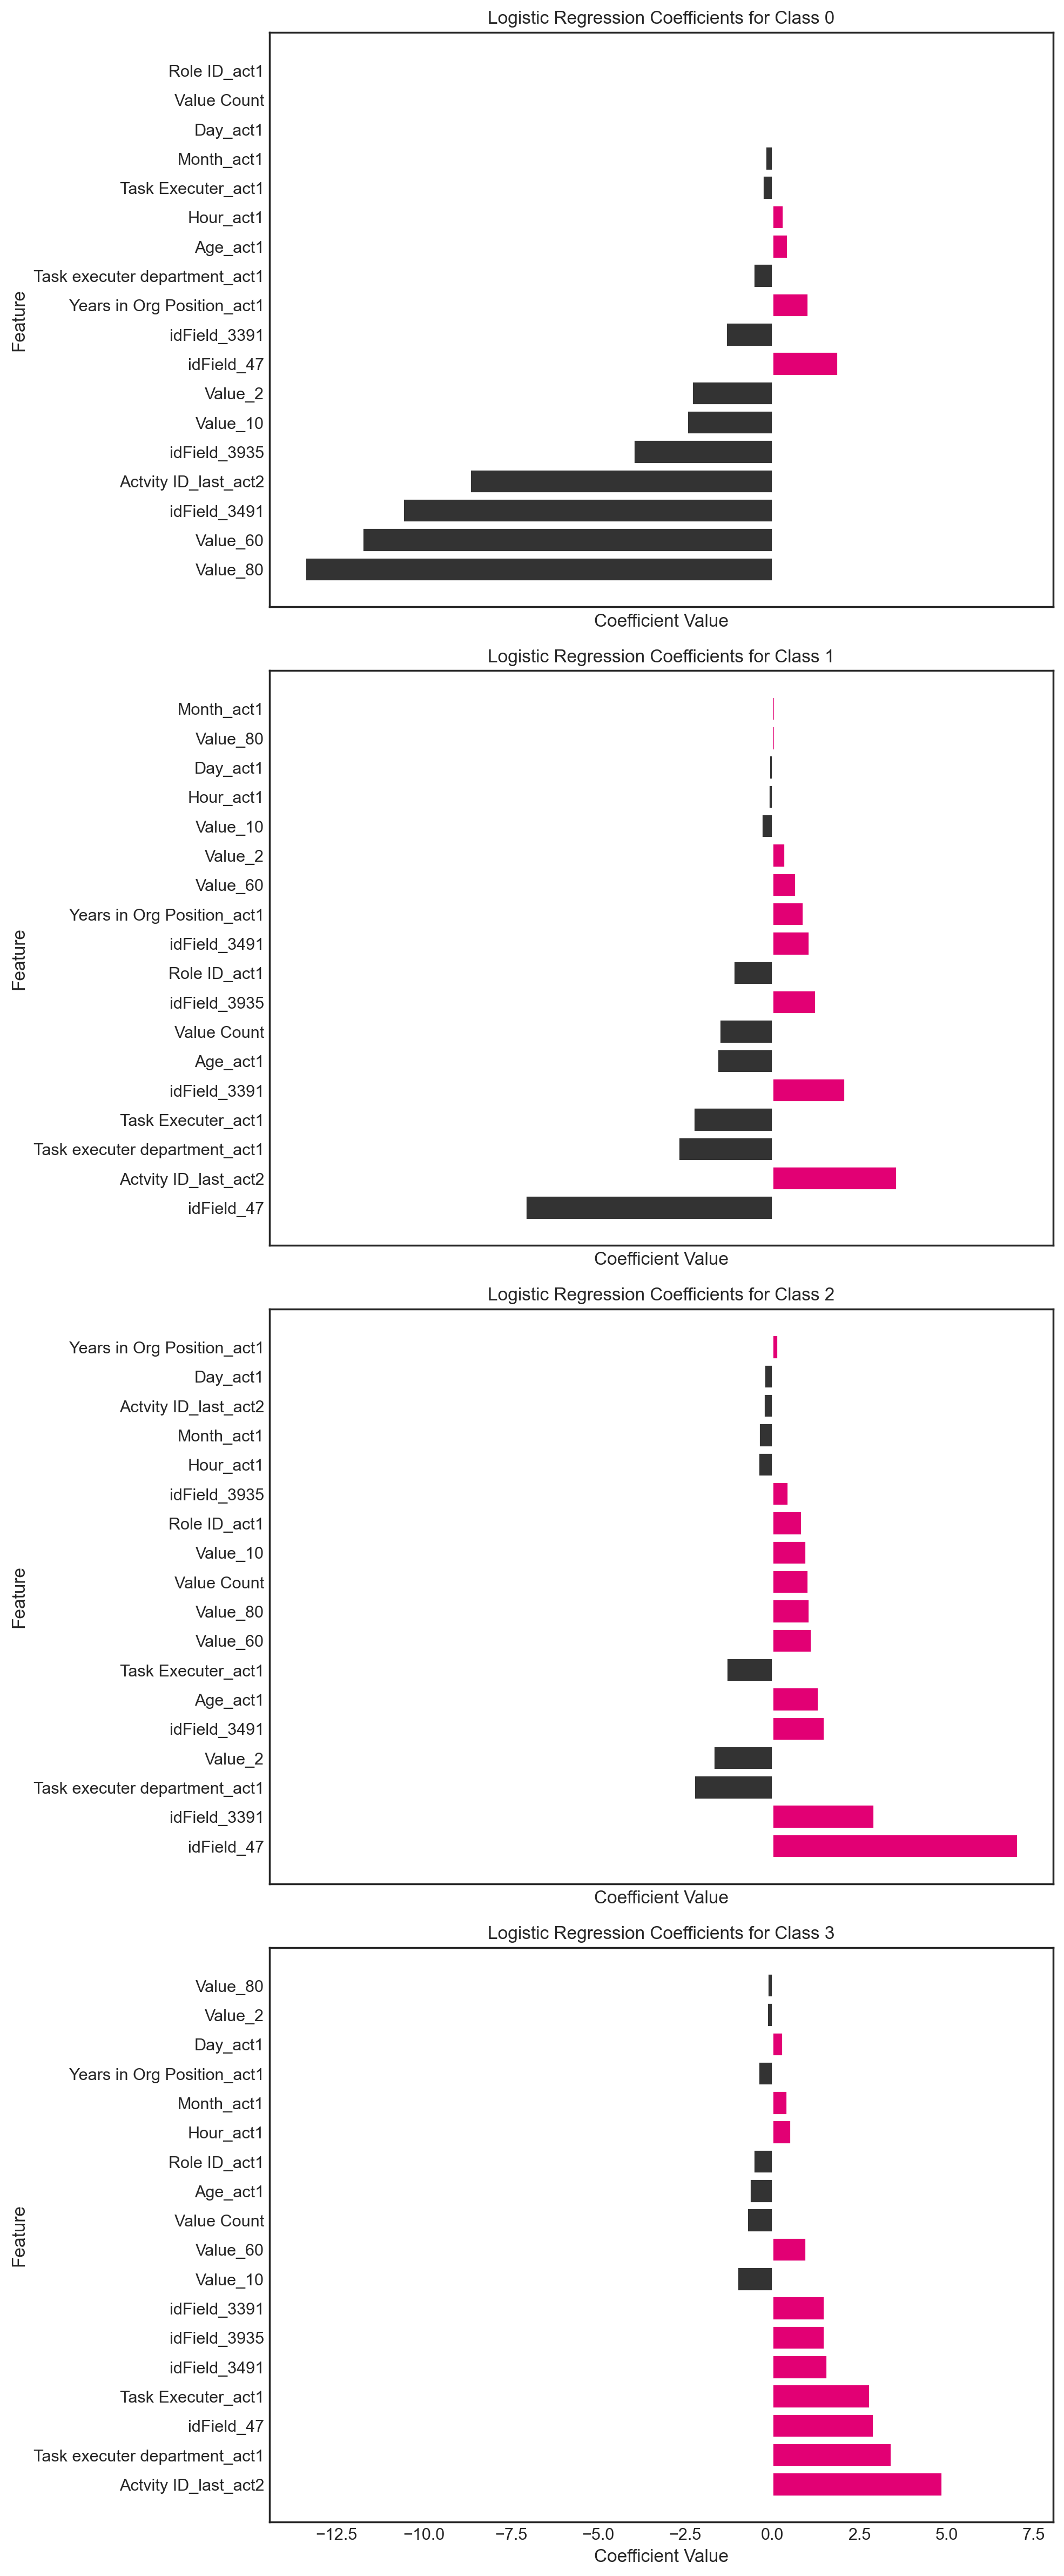

In [69]:
# Extract coefficients for each class
coefficients = lr_fit.coef_
features = X_smote.columns

# Create subplots to display coefficients for each class
num_classes = coefficients.shape[0]
fig, axes = plt.subplots(num_classes, 1, figsize=(10, 6 * num_classes), sharex=True)

for i in range(num_classes):
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients[i]
    })

    # Sort the DataFrame by the absolute value of coefficients
    coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)
    
    # Plot the coefficients
    colors = np.where(coef_df['Coefficient'] > 0, "#E20074", "#333333")
    axes[i].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_ylabel('Feature')
    axes[i].set_title(f'Logistic Regression Coefficients for Class {i}')

plt.tight_layout()
plt.show()


- For Class 0, `Value_80`, `Value_60` and `idField_3491` is strongly negative, higher values decrease the likelihood of Class 0.
- For Class 1, `idField_47` is the one that decreases the most the likelihood of this class and `Activity ID_last_act2` is the variable that increases the most
- For Class 2, `idField_47` and `idField_3391` increase its likelihood
- Finally, for Class 3, `Activity ID_last_act2` and `Task executer department_act1` are the ones that positively influence the most